<a href="https://colab.research.google.com/github/ortalamb/flask_quiz/blob/main/eda_29jan21_o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**
**Natural Disasters Data Explorer**

#**Introduction**

This community availble dataset describes a metrices of natural disasters occurence between the years 1900-2019, their impact over the entire world, different countries, continents, and spread over verious levels of income. 


Dataset can be retrieved from:
https://www.kaggle.com/mathurinache/natural-disasters-data-explorer

# **Prerequisite dependencies**

In [118]:
%pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import plotly.express as px
import plotly.offline as po
import plotly.graph_objs as pg
%matplotlib inline
plt.style.use('seaborn')
from pyparsing.core import Regex

# **Retrieving the dataset**

In [119]:
url = 'https://drive.google.com/file/d/1EQ2LyOVxOyuVJawz1bbuZVrU7XIA6VFF'
gdd.download_file_from_google_drive(url.split('/')[-1], './natural-disasters.csv')

In [120]:
df_natural_disasters = pd.read_csv('natural-disasters.csv')

# **Data inspection**
- The dataset is constructed of 171 columns and 1604 rows
- Expressing 11 disaster types: drought, earthquakes, volcanic activity, floods, storm, mass movements, landslides, fog, wildfires, extreme temperatures and glacial lake outbursts.
- Decadal measurements - annual average over the subsequent ten-year period Between the years 1900 – 2019
- Each value repeats itself in four different categories (world, continent, country and income level). Avoiding this redundancy the dataset was subdivided into four different subsets


# **Used definitions and remarks**
- People affected - Those requiring immediate assistance during an emergency situation.
- Total affected - Sum of "people affected", "injured" and "homeless".
- GDP (gross domestic product) data are only available starting 1960

# **Exploring the data**


In [121]:
df_natural_disasters.head()

Number of deaths from drought  ...  total_affected_rate_per_100k_all_disasters
0                            0.0  ...                                    2.381236
1                            0.0  ...                                   44.060951
2                            0.0  ...                                  547.029875
3                            0.0  ...                                  218.081859
4                            0.0  ...                                  316.150814

[5 rows x 171 columns]

In [122]:
df_natural_disasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Columns: 171 entries, Number of deaths from drought to total_affected_rate_per_100k_all_disasters
dtypes: float64(152), int64(18), object(1)
memory usage: 2.1+ MB


In [123]:
df_natural_disasters.describe()

Number of deaths from drought  ...  total_affected_rate_per_100k_all_disasters
count                    1604.000000  ...                                 1604.000000
mean                     2775.904988  ...                                 1035.891535
std                     27015.829669  ...                                 2404.238288
min                         0.000000  ...                                    0.000000
25%                         0.000000  ...                                    0.000000
50%                         0.000000  ...                                   33.259217
75%                         0.000000  ...                                  686.393967
max                    472400.000000  ...                                18032.535470

[8 rows x 170 columns]

In [124]:
df_natural_disasters.columns.to_list()

['Number of deaths from drought',
 'Number of people injured from drought',
 'Number of people affected from drought',
 'Number of people left homeless from drought',
 'Number of total people affected by drought',
 'Reconstruction costs from drought',
 'Insured damages against drought',
 'Total economic damages from drought',
 'Death rates from drought',
 'Injury rates from drought',
 'Number of people affected by drought per 100,000',
 'Homelessness rate from drought',
 'Total number of people affected by drought per 100,000',
 'Number of deaths from earthquakes',
 'Number of people injured from earthquakes',
 'Number of people affected by earthquakes',
 'Number of people left homeless from earthquakes',
 'Number of total people affected by earthquakes',
 'Reconstruction costs from earthquakes',
 'Insured damages against earthquakes',
 'Total economic damages from earthquakes',
 'Death rates from earthquakes',
 'Injury rates from earthquakes',
 'Number of people affected by earthquake

#**Cleaning the data**
Some columns were found to be missing valid or useful values and thus were removed from the analysis (Fog and glacial lake outbursts)

In [125]:
df_natural_disasters.columns = df_natural_disasters.columns.str.strip().str.replace(' ', '_')

In [126]:
df_natural_disasters.nunique().to_dict()

{'Death_rates_from_disasters': 1155,
 'Death_rates_from_drought': 121,
 'Death_rates_from_earthquakes': 501,
 'Death_rates_from_extreme_temperatures': 238,
 'Death_rates_from_floods': 728,
 'Death_rates_from_fog': 5,
 'Death_rates_from_glacial_lake_outbursts': 0,
 'Death_rates_from_landslides': 346,
 'Death_rates_from_mass_movements': 87,
 'Death_rates_from_storms': 0,
 'Death_rates_from_volcanic_activity': 140,
 'Death_rates_from_wildfires': 159,
 'Entity': 226,
 'Homelessness_rate_from_disasters': 695,
 'Homelessness_rate_from_drought': 1,
 'Homelessness_rate_from_earthquakes': 291,
 'Homelessness_rate_from_extreme_temperatures': 15,
 'Homelessness_rate_from_floods': 432,
 'Homelessness_rate_from_fog': 1,
 'Homelessness_rate_from_glacial_lake_outbursts': 0,
 'Homelessness_rate_from_landslides': 132,
 'Homelessness_rate_from_mass_movements': 25,
 'Homelessness_rate_from_storms': 332,
 'Homelessness_rate_from_volcanic_activity': 60,
 'Homelessness_rate_from_wildfires': 107,
 'Injury_ra

In [127]:
df_natural_disasters.loc[:,df_natural_disasters.columns.str.contains(pat='glacial|fog')].sum()

Number_of_deaths_from_fog                                                1600.000000
Number_of_people_injured_from_fog                                           0.000000
Number_of_people_affected_by_fog                                            0.000000
Number_of_people_left_homeless_from_fog                                     0.000000
Number_of_total_people_affected_by_fog                                      0.000000
Reconstruction_costs_from_fog                                               0.000000
Insured_damages_against_fog                                                 0.000000
Total_economic_damages_from_fog                                             0.000000
Death_rates_from_fog                                                        0.932552
Injury_rates_from_fog                                                       0.000000
Number_of_people_affected_by_fog_per_100,000                                0.000000
Homelessness_rate_from_fog                                       

In [128]:
print(df_natural_disasters.set_index(['Entity','Year']).Number_of_deaths_from_fog.value_counts())
df_natural_disasters.loc[df_natural_disasters.Number_of_deaths_from_fog>0].set_index(['Entity','Year','Number_of_deaths_from_fog'])

0      1600
400       4
Name: Number_of_deaths_from_fog, dtype: int64


Number_of_deaths_from_drought  ...  total_affected_rate_per_100k_all_disasters
Entity         Year Number_of_deaths_from_fog                                 ...                                            
Europe         1950 400                                                  0.0  ...                                   11.623692
High income    1950 400                                                  0.0  ...                                   88.093567
United Kingdom 1950 400                                                  0.0  ...                                    0.000000
World          1950 400                                                  0.0  ...                                   75.897771

[4 rows x 168 columns]

**1952 - Great Smog of London**\
As described above, Fog had only two entries in the data ('0' and one occasion of '400' reported for 1950 in UK). This individual value does not contribute to the overall insights and thus was removed.\
However, it is interesting to note that indeed it is a known incident occurred in 5–9 December 1952 in London and literature reports as much as 4,000 people killed as a result.\
Picture adopted from: https://en.wikipedia.org/wiki/Great_Smog_of_London



![image.png]()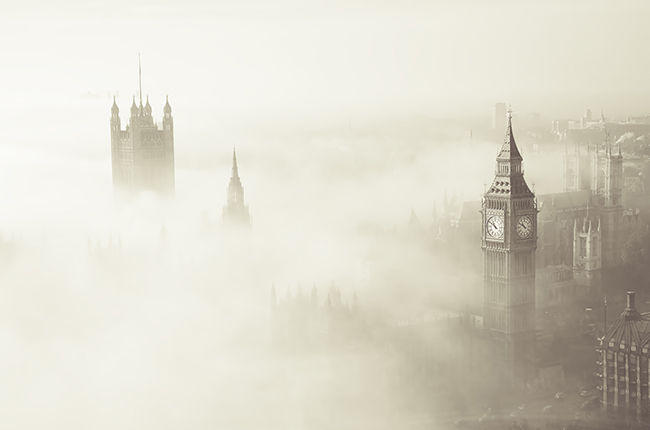

In [129]:
df_natural_disasters.drop(df_natural_disasters.columns[df_natural_disasters.columns.str.contains(pat='glacial|fog')],axis=1,inplace=True)
df_natural_disasters['Death rates from storms']=df_natural_disasters['deaths_rate_per_100k_storm']
df_natural_disasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Columns: 146 entries, Number_of_deaths_from_drought to Death rates from storms
dtypes: float64(141), int64(4), object(1)
memory usage: 1.8+ MB


In [130]:
print(len(df_natural_disasters['Entity'].unique()))
df_natural_disasters['Entity'].unique()

226


array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Europe', 'Fiji', 'Finland',
       'France', 'French Guiana', 'French Polynes

In [131]:
print(len(df_natural_disasters['Year'].unique()))
df_natural_disasters['Year'].unique()

12


array([1950, 1960, 1970, 1980, 1990, 2000, 2010, 1900, 1910, 1920, 1930,
       1940])

# **Focusing on subset of the data**
In order to deduct meaningful insights the following column were further investigated:
- Number_of_deaths
- Number_of_total_people_affected
- Number_of_people_left_homeless\
in combination the Year and Entity (world, continent, country and level of income).


In [132]:
df_deaths=df_natural_disasters.loc[:,df_natural_disasters.columns.str.contains(pat='Number_of_deaths|Year|Entity')].copy()
df_eco=df_natural_disasters.loc[:,df_natural_disasters.columns.str.contains(pat='Number_of_deaths|Number_of_total_people_affected|Number_of_people_left_homeless|as_|Year|Entity')].copy()
df_eco.set_index('Entity')


Number_of_deaths_from_drought  ...  Year
Entity                                      ...      
Afghanistan                            0.0  ...  1950
Afghanistan                            0.0  ...  1960
Afghanistan                            0.0  ...  1970
Afghanistan                            0.0  ...  1980
Afghanistan                            0.0  ...  1990
...                                    ...  ...   ...
Zimbabwe                               0.0  ...  1970
Zimbabwe                               0.0  ...  1980
Zimbabwe                               0.0  ...  1990
Zimbabwe                               0.0  ...  2000
Zimbabwe                               0.0  ...  2010

[1604 rows x 41 columns]

# **Subsetting the data**

In [133]:
df_continents=df_eco[df_eco.Entity.isin(['Africa', 'Asia', 'Australia','North America','South America','Europe', 'Oceania'])]
df_continents_1960_2010=df_continents[df_continents.Year.isin([1960,1970,1980,1990,2000,2010])]
df_countries=df_eco[~df_eco.Entity.isin(['Africa', 'Asia', 'Australia','North America','South America','Europe','Oceania','High income','Low income','Lower middle income', 'Upper middle income', 'World'])]
df_countries_1960_2010=df_countries[df_countries.Year.isin([1960,1970,1980,1990,2000,2010])]
df_incomes=df_eco[df_eco.Entity.isin(['High income','Low income','Lower middle income', 'Upper middle income'])]
df_incomes_1960_2010=df_incomes[df_incomes.Year.isin([1960,1970,1980,1990,2000,2010])]
# df_continents_1960_2010.set_index(['Entity','Year']) 

In [134]:
df_world=df_eco[df_eco['Entity']=='World']
df_world_1960_2010=df_world[df_world.Year.isin([1960,1970,1980,1990,2000,2010])]

#**Questioning the DF**





**1. What year affected most of the countries?**

Text(0, 0.5, 'Year')

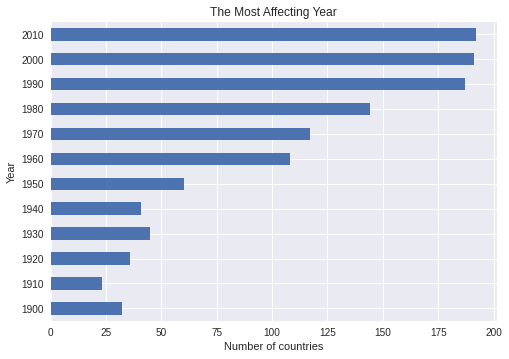

In [135]:
df_all=df_countries[df_countries.select_dtypes("float64").sum(min_count=1,axis=1)>0]
df_all.set_index('Year').value_counts('Year').sort_index().plot.barh()
plt.title("The Most Affecting Year")
plt.xlabel("Number of countries")
plt.ylabel("Year")

2010-2019 was the year that affected the largest number of countries

**2. Which year was the most lethal in the "world" ?**




In [136]:
px.histogram(df_world, 
             x="Year",
             y="Number_of_deaths_from_disasters",
             title="World-Number of deaths from all disasters",
             barmode="group",
             color="Entity",
             nbins=30
             ).update_xaxes(type='category')

1920-1929 was the most lethal decade with more then 500,000 deaths across the world as a result of natural disasters.

**3. What is the distribution of the different disasters across the years?**

Text(0, 0.5, 'Number of deaths')

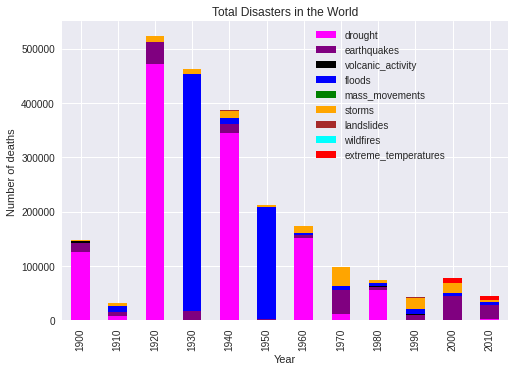

In [137]:
df_world=df_eco[df_eco['Entity']=='World'].set_index('Year')
df_world_num=df_world.loc[:,df_world.columns.str.contains(pat='Number_of_deaths|Year' )].copy()
df_world_num.columns = df_world_num.columns.str.strip().str.replace('Number_of_deaths_from_', '')
# df_deaths.drop(['Number of deaths from glacial lake outbursts', 'Death rates from glacial lake outbursts'],axis=1,inplace=True)
df_world_num.drop(['disasters'],axis=1,inplace=True)
df_world_num.plot(kind='bar', stacked=True, color=['magenta', 'purple', 'black', 'blue', 'green' ,'orange','brown', 'cyan', 'red'])
plt.legend(bbox_to_anchor=(0.55,1.0), loc="upper left")
plt.title("Total Disasters in the World")
plt.xlabel("Year")
plt.ylabel("Number of deaths")

1920-1929 was the most lethal decade with more then 500,000 deaths across the world as a result of natural disasters.



**4. How does the "total affected" parameter distributed across the years?**

Text(0, 0.5, 'Number of total people affected')

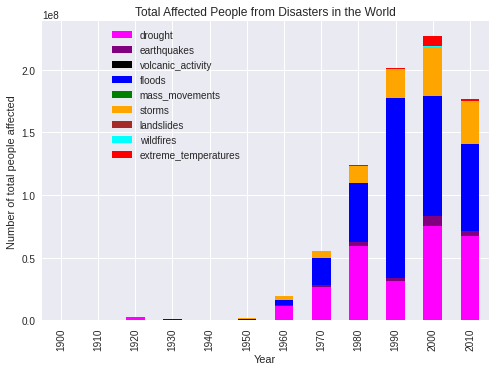

In [138]:
df_world=df_eco[df_eco['Entity']=='World'].set_index('Year')
df_world_num=df_world.loc[:,df_world.columns.str.contains(pat='total_people_affected|Year' )].copy()
df_world_num.columns = df_world_num.columns.str.strip().str.replace('Number_of_total_people_affected_by_', '')
# df_deaths.drop(['Number of deaths from glacial lake outbursts', 'Death rates from glacial lake outbursts'],axis=1,inplace=True)
df_world_num.drop(['disasters'],axis=1,inplace=True)
df_world_num.plot(kind='bar', stacked=True, color=['magenta', 'purple', 'black', 'blue', 'green' ,'orange','brown', 'cyan', 'red'])
plt.legend(bbox_to_anchor=(0.3,1.0), loc="upper center")
plt.title("Total Affected People from Disasters in the World")
plt.xlabel("Year")
plt.ylabel("Number of total people affected")

Number of people that were "total affected" increased across the years, until reaching its pick between 2000-2009.




**5. Number of deaths Vs total affected from disasters**

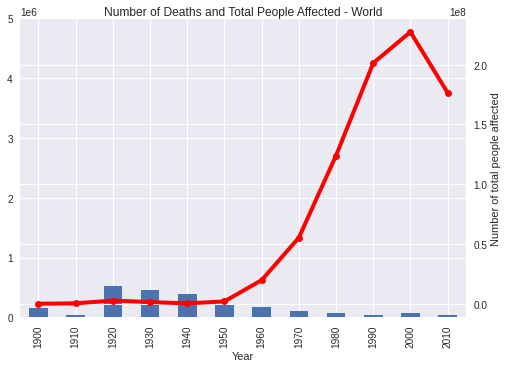

In [139]:
ax=df_world['Number_of_deaths_from_disasters'].plot(kind='bar')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),df_world['Number_of_total_people_affected_by_disasters'],marker='o', c='red', linewidth=4)
plt.title("Number of Deaths and Total People Affected - World",loc='center',pad=(1))
plt.xlabel("Year")
plt.ylabel("Number of total people affected")
ax.set_ylim(0,5e6)
plt.show()

Although it’s clear that the number of people dying decreases with time, the number of total affected people, as a result of the disasters, increases dramatically. This observation implying that the number of deaths alone is not sufficient indicators for the total effect of disasters.

**6. 1920-1929 was the most lethal decade, expressing causalities mainly from drought. Which countries suffered from this?**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



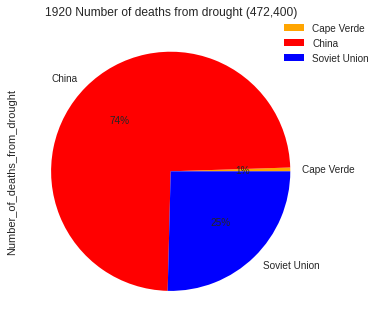

In [140]:
df_countries_1920=df_countries[df_deaths['Year']==1920]
df_countries_1920[df_countries_1920['Number_of_deaths_from_drought']>0].set_index('Entity').plot(
                                kind='pie', y='Number_of_deaths_from_drought', autopct='%1.0f%%',
                                colors = ['orange', 'red', 'blue'],
                                title='1920 Number of deaths from drought (472,400)')
plt.legend(bbox_to_anchor=(0.85,1.025), loc="upper left")

Out of the total numbers of deaths in 1920 decade, China was accounted for three quarters of the casualties.

In [141]:
print(df_countries_1920['Number_of_deaths_from_drought'].sum())
df_countries_1920[df_countries_1920['Number_of_deaths_from_drought']>0].set_index(['Entity','Number_of_deaths_from_drought','Number_of_total_people_affected_by_drought'])

472400.0


Number_of_people_left_homeless_from_drought  ...  Year
Entity       Number_of_deaths_from_drought Number_of_total_people_affected_by_drought                                               ...      
Cape Verde   2400.0                        0.0                                                                                   0  ...  1920
China        350000.0                      2000000.0                                                                             0  ...  1920
Soviet Union 120000.0                      500000.0                                                                              0  ...  1920

[3 rows x 39 columns]

**7. Which countries suffered from the floods in 1930-1939?**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



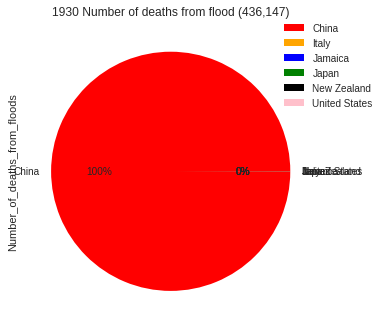

In [142]:
df_countries_1930=df_countries[df_deaths['Year']==1930]
df_countries_1930[df_countries_1930['Number_of_deaths_from_floods']>0].set_index('Entity').plot(
                                kind='pie', y='Number_of_deaths_from_floods', autopct='%1.0f%%',
                                colors = ['red','orange','blue','green','black','pink'],
                                title='1930 Number of deaths from flood (436,147)')
plt.legend(bbox_to_anchor=(0.85,1.025), loc="upper left")

In [143]:
print(df_countries_1930['Number_of_deaths_from_floods'].sum())
df_countries_1930[df_countries_1930['Number_of_deaths_from_floods']>0].set_index(['Entity','Number_of_deaths_from_floods','Number_of_total_people_affected_by_floods'])

436146.5


Number_of_deaths_from_drought  ...  Year
Entity        Number_of_deaths_from_floods Number_of_total_people_affected_by_floods                                 ...      
China         436000.0                     1363000.0                                                            0.0  ...  1930
Italy         1.0                          0.0                                                                  0.0  ...  1930
Jamaica       16.4                         0.0                                                                  0.0  ...  1930
Japan         93.3                         0.0                                                                  0.0  ...  1930
New Zealand   2.1                          0.0                                                                  0.0  ...  1930
United States 33.7                         0.0                                                                  0.0  ...  1930

[6 rows x 39 columns]

Although several countries suffered from deaths their values were neglectable and practically not showen on the plot.

**8. Which countries suffered from the 1940-1949 drought?**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



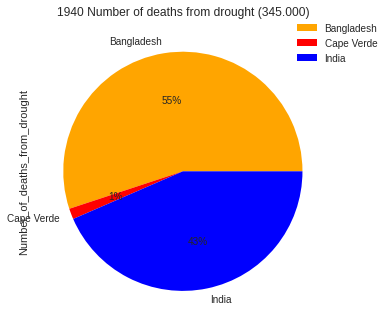

In [144]:
df_countries_1940=df_countries[df_deaths['Year']==1940]
df_countries_1940[df_countries_1940['Number_of_deaths_from_drought']>0].set_index('Entity').plot(
                                kind='pie', y='Number_of_deaths_from_drought', autopct='%1.0f%%',
                                colors = ['orange', 'red', 'blue'],
                                title='1940 Number of deaths from drought (345.000)')
plt.legend(bbox_to_anchor=(0.85,1.025), loc="upper left")

In [145]:
print(df_countries_1940['Number_of_deaths_from_drought'].sum())
df_countries_1940[df_countries_1940['Number_of_deaths_from_drought']>0].set_index(['Entity','Number_of_deaths_from_drought','Number_of_total_people_affected_by_drought'])

345000.0


Number_of_people_left_homeless_from_drought  ...  Year
Entity     Number_of_deaths_from_drought Number_of_total_people_affected_by_drought                                               ...      
Bangladesh 190000.0                      0.0                                                                                   0  ...  1940
Cape Verde 5000.0                        0.0                                                                                   0  ...  1940
India      150000.0                      0.0                                                                                   0  ...  1940

[3 rows x 39 columns]

Drought in 1940-1949 impacted mainly south Asia region, India and Bangladesh (British India at that time) accounting for ~98% of casualties.

**9. Focusing on China as a country showing large numbers of casulties, Which disasters affected it?**

Text(0, 0.5, 'Number of deaths')

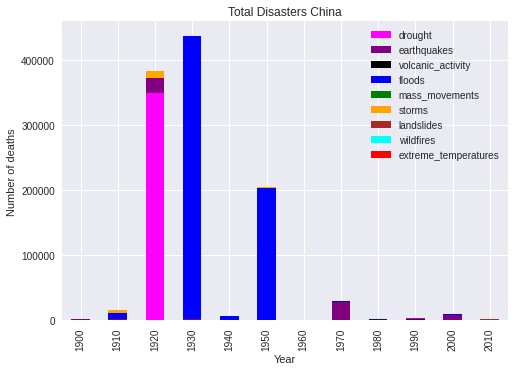

In [146]:
df_china=df_eco[df_eco['Entity']=='China'].set_index('Year')
df_china_num=df_china.loc[:,df_china.columns.str.contains(pat='Number_of_deaths|Year' )].copy()
df_china_num.columns = df_china_num.columns.str.strip().str.replace('Number_of_deaths_from_', '')
df_china_num.drop(['disasters'],axis=1,inplace=True)
df_china_num.plot(kind='bar', stacked=True, color=['magenta', 'purple', 'black', 'blue', 'green' ,'orange','brown', 'cyan', 'red'])
plt.title("Total Disasters China")
plt.xlabel("Year")
plt.ylabel("Number of deaths")

Judging the numbers of deaths only, **floods and drought** were the most lethal.

**10. What was the total affected numbers in China?**

Text(0, 0.5, 'Number of total people affected')

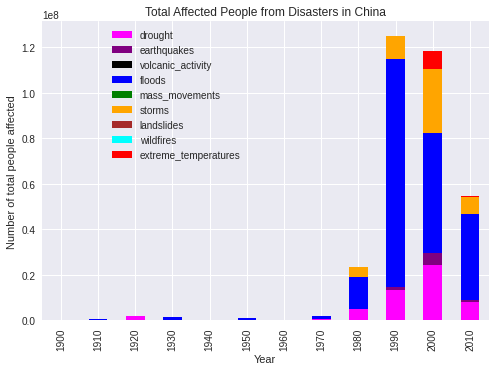

In [147]:
df_china_num=df_china.loc[:,df_china.columns.str.contains(pat='total_people_affected|Year' )].copy()
df_china_num.columns = df_china_num.columns.str.strip().str.replace('Number_of_total_people_affected_by_', '')
# df_deaths.drop(['Number of deaths from glacial lake outbursts', 'Death rates from glacial lake outbursts'],axis=1,inplace=True)
df_china_num.drop(['disasters'],axis=1,inplace=True)
df_china_num.plot(kind='bar', stacked=True, color=['magenta', 'purple', 'black', 'blue', 'green' ,'orange','brown', 'cyan', 'red'])
plt.legend(bbox_to_anchor=(0.3,1.0), loc="upper center")
plt.title("Total Affected People from Disasters in China")
plt.xlabel("Year")
plt.ylabel("Number of total people affected")

Most of the people affected by disasters in China, suffered from floods, drought, storms and extreme temperature (2010). 

**11. Number of deaths Vs number of people total affected in China**

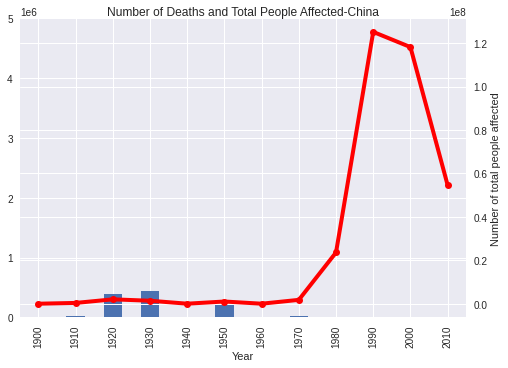

In [148]:
df_china=df_eco[df_eco['Entity']=='China'].set_index('Year')
ax=df_china['Number_of_deaths_from_disasters'].plot(kind='bar')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),df_china['Number_of_total_people_affected_by_disasters'],marker='o', c='red', linewidth=4)
plt.title("Number of Deaths and Total People Affected-China",loc='center',pad=(1))
plt.xlabel("Year")
plt.ylabel("Number of total people affected")
ax.set_ylim(0,5e6)
plt.show()

In comparison to number of deaths, the number of total affected are concentrated in 1980-2010 whereas, the number of deaths are concentrated in 1910-1970

**12. Extending the questions to other countries showing high numbers (Soviet Union, India and Bangladesh) or high interest (Israel and Haiti)**

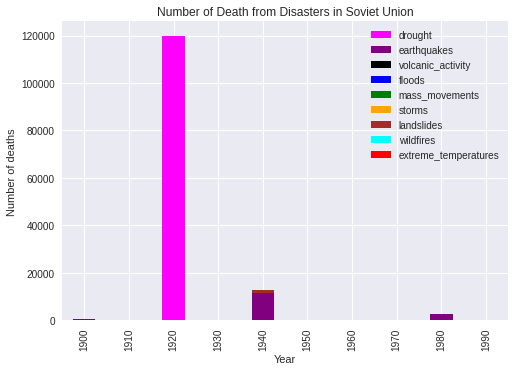

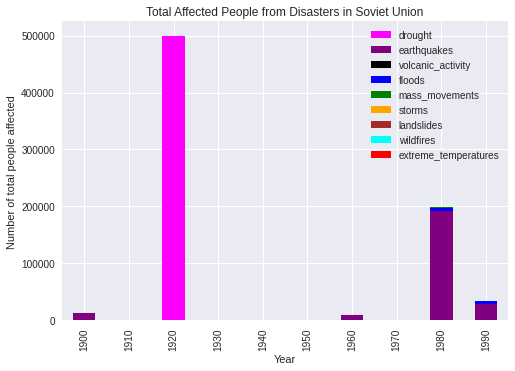

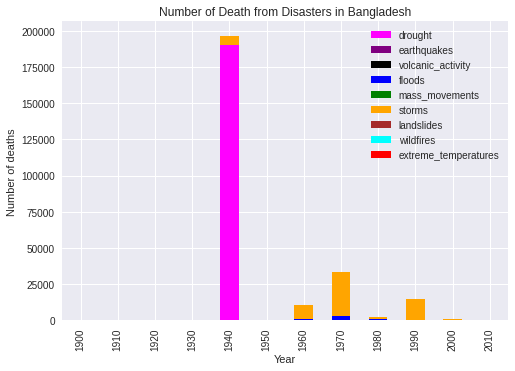

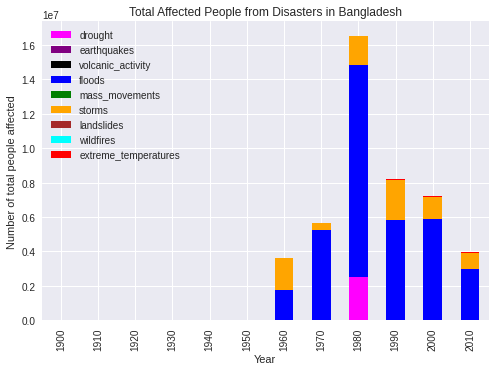

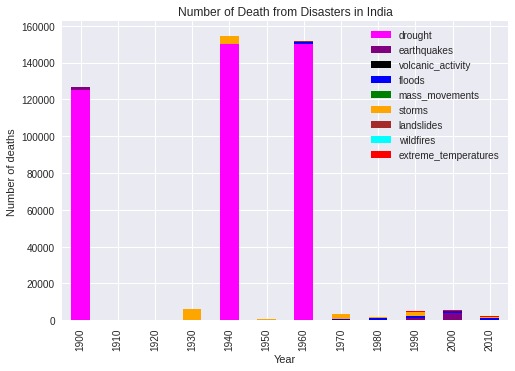

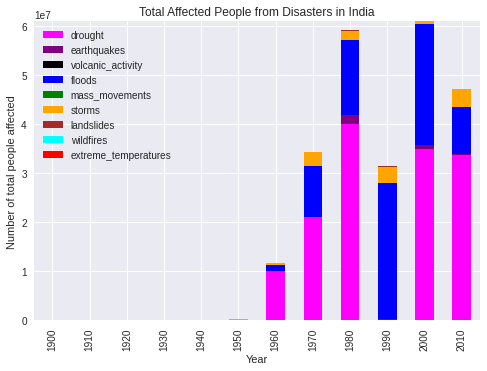

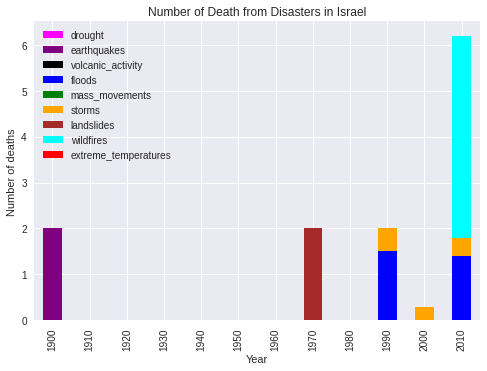

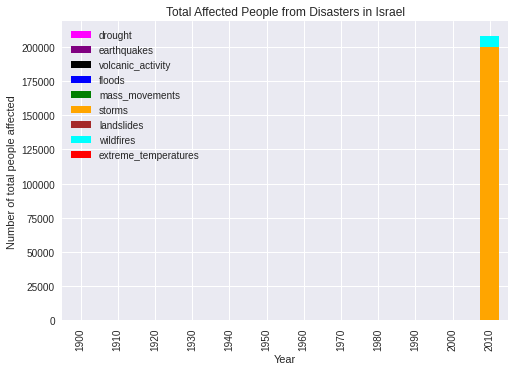

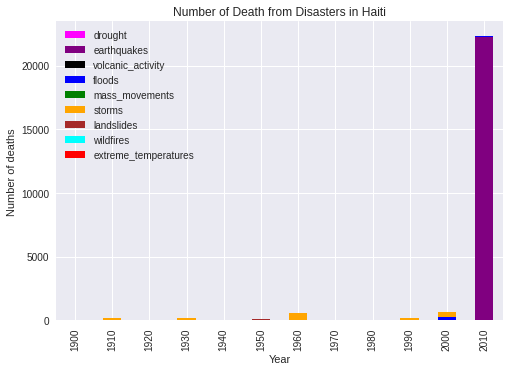

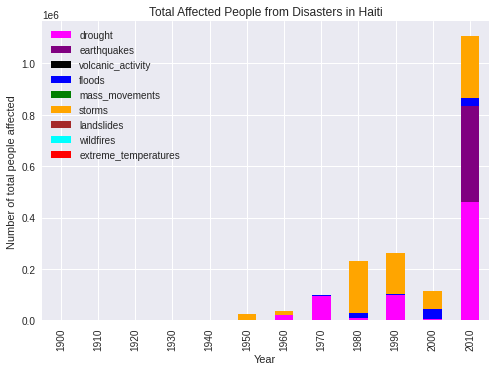

In [149]:
countries=['Soviet Union','Bangladesh','India','Israel','Haiti']
for x in countries:
    df_country=df_eco[df_eco['Entity']==x].set_index('Year')
    df_country_num=df_country.loc[:,df_country.columns.str.contains(pat='Number_of_deaths_|Year' )].copy()
    df_country_num.columns = df_country_num.columns.str.strip().str.replace('Number_of_deaths_from_', '')
    df_country_num.drop(['disasters'],axis=1,inplace=True)
    df_country_aff=df_country.loc[:,df_country.columns.str.contains(pat='Number_of_total_people_affected_by_|Year' )].copy()
    df_country_aff.columns = df_country_aff.columns.str.strip().str.replace('Number_of_total_people_affected_by_', '')
    df_country_aff.drop(['disasters'],axis=1,inplace=True)
    df_country_num.plot(kind='bar', stacked=True, color=['magenta', 'purple', 'black', 'blue', 'green' ,'orange','brown', 'cyan', 'red'])
    plt.title(f"Number of Death from Disasters in {x}")
    plt.xlabel("Year")
    plt.ylabel("Number of deaths")
    df_country_aff.plot(kind='bar', stacked=True, color=['magenta', 'purple', 'black', 'blue', 'green' ,'orange','brown', 'cyan', 'red'])
    plt.title(f"Total Affected People from Disasters in {x}")
    plt.xlabel("Year")
    plt.ylabel("Number of total people affected")

**13. An interesting phenomenon that was observed, Floods and drought lead alternatively the number of deaths in the world for the majority of the last century**

Text(0, 0.5, 'Number of deaths')

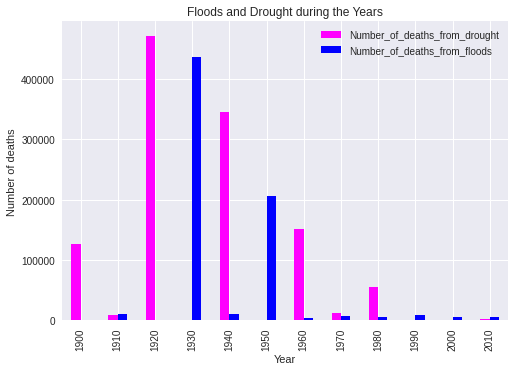

In [150]:
df_world=df_eco[df_eco['Entity']=='World'].set_index('Year')
df_world_num=df_world.loc[:,df_world.columns.str.contains(pat='Number_of_deaths_from_drought|Number_of_deaths_from_floods|Year' )].copy()
# df_deaths.drop(['Number of deaths from glacial lake outbursts', 'Death rates from glacial lake outbursts'],axis=1,inplace=True)
# df_world_num.drop(['Number_of_deaths_from_disasters'],axis=1,inplace=True)
df_world_num.plot(kind='bar', color=['magenta', 'blue', 'green' ,'orange','brown', 'cyan', 'red'])
plt.title("Floods and Drought during the Years")
plt.xlabel("Year")
plt.ylabel("Number of deaths")

**14. General method extracting all information for countries and disasters.**

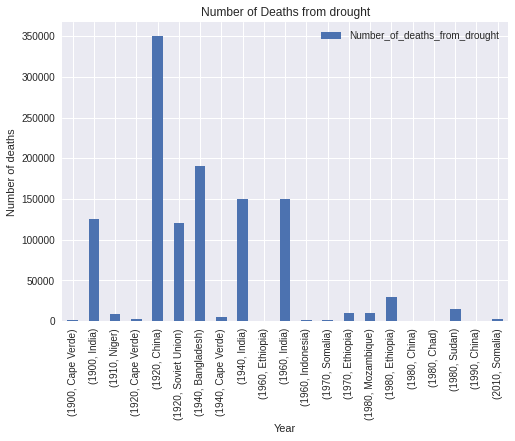

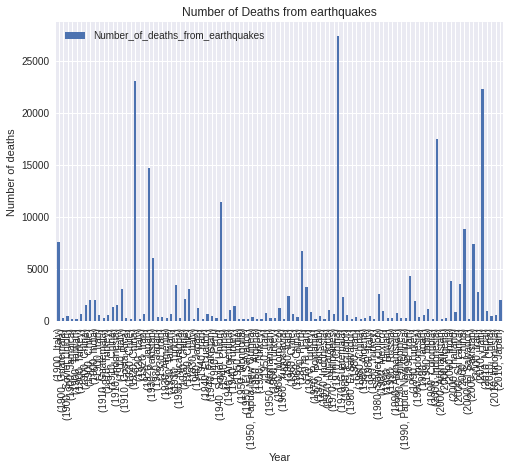

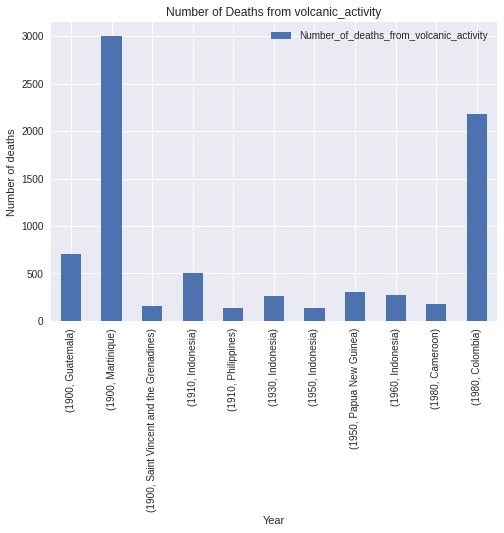

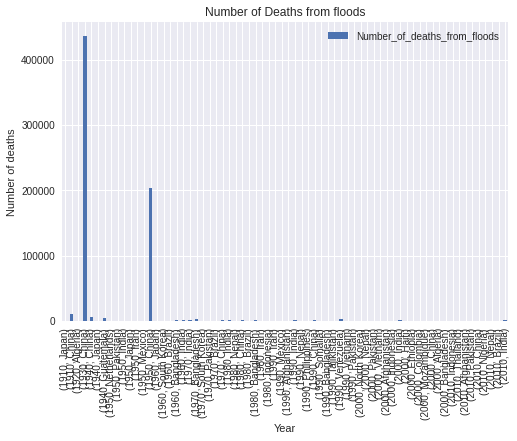

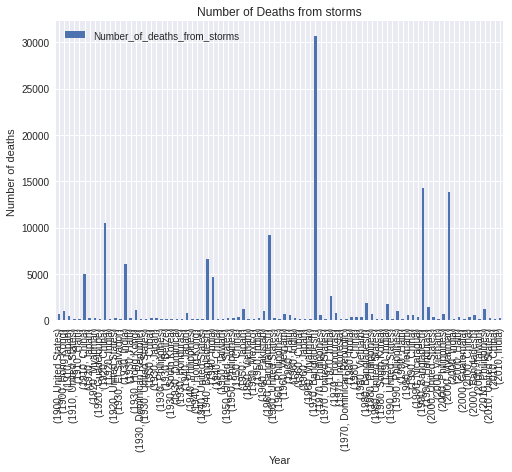

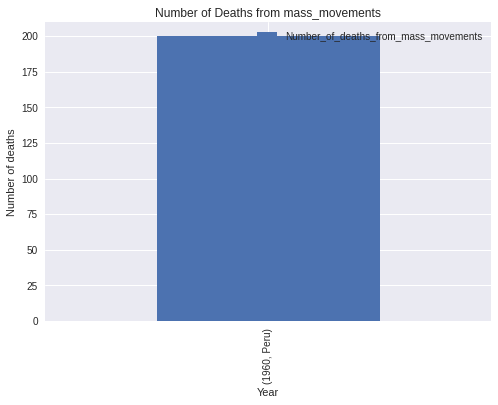

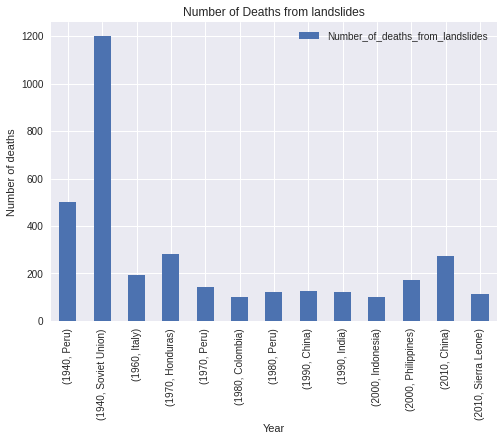

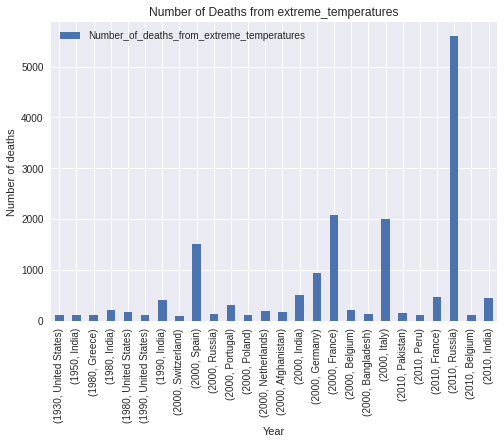

In [151]:
disasters=['drought','earthquakes','volcanic_activity','floods','storms','mass_movements','landslides','extreme_temperatures']
for d in disasters:
    df_c_num=df_countries.loc[:,df_countries.columns.str.contains(pat=f'Number_of_deaths_from_{d}|Year|Entity')].copy()
    df_c_num_d=df_c_num[df_c_num[f'Number_of_deaths_from_{d}']>100].set_index(['Year','Entity']).sort_values('Year').plot.bar()
    plt.title(f"Number of Deaths from {d}")
    plt.xlabel("Year")
    plt.ylabel("Number of deaths")


This Approach was proved to be very noisy; however, it reflects the general tendency. If a specific country or year is of interest a different approach or data subset is suggested.

**15. Economic affect from disasters on the GDP**

Text(0, 0.5, 'Total economic damages as a share of GDP')

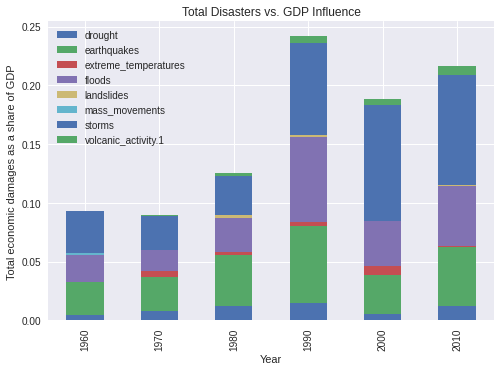

In [152]:
# df_world_1960_2010=df_world[df_world.Year.isin([1960,1970,1980,1990,2000,2010])
df_world_gdp=df_world_1960_2010.loc[:,df_world_1960_2010.columns.str.contains(pat='GDP|Year')].copy()
df_world_gdp.columns = df_world_gdp.columns.str.strip().str.replace('Total_economic_damages_from_', '')
df_world_gdp.columns = df_world_gdp.columns.str.strip().str.replace('_as_a_share_of_GDP', '')
df_world_gdp.drop(['disasters'],axis=1,inplace=True)
df_world_gdp.drop(['volcanic_activity'],axis=1,inplace=True)
df_world_gdp.set_index('Year').plot(kind='bar', stacked=True)
plt.title("Total Disasters vs. GDP Influence")
plt.xlabel("Year")
plt.ylabel("Total economic damages as a share of GDP")

Total damage (in world GDP) as a result of disasters is showing stabile reduction mainly due to drought, floods and earthquakes. However, for future investigation it is interest to compare the reduction in comparison to actual growth in world GDP.

# **Correlation**
A series of correlation mapping were held in order to investigate possible interactions between different factors.


**16. Number of deaths and total affected in correlation with economic damage** 

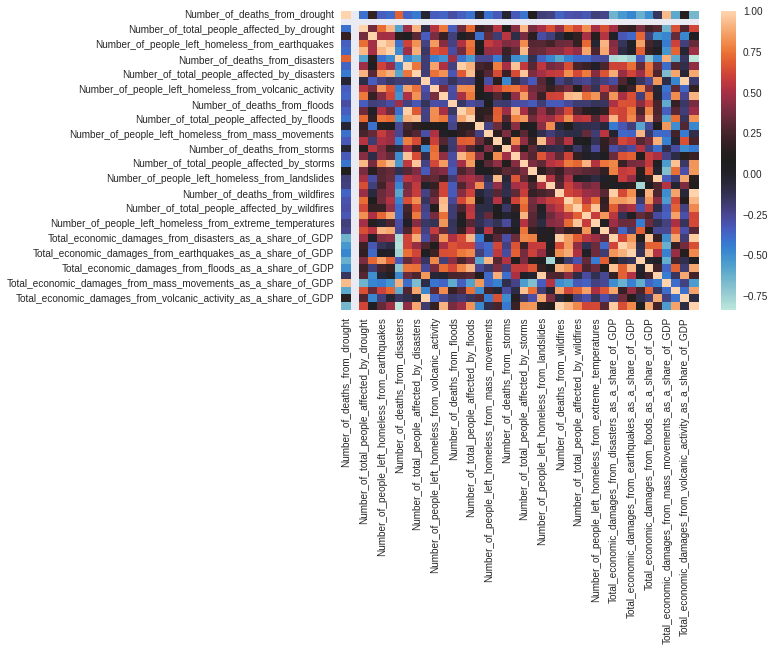

In [153]:
sns.heatmap(df_world.corr(), cmap='icefire')

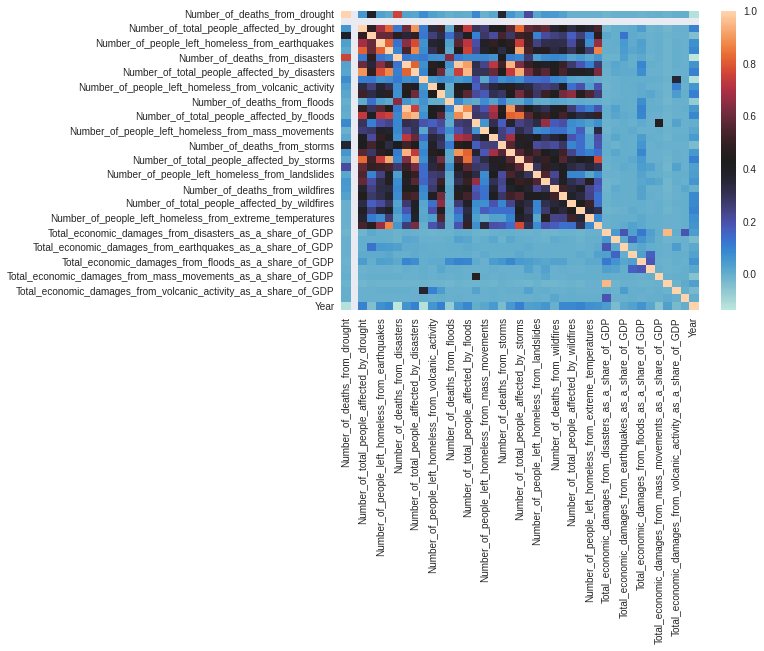

In [154]:
sns.heatmap(df_eco.corr(), cmap='icefire')

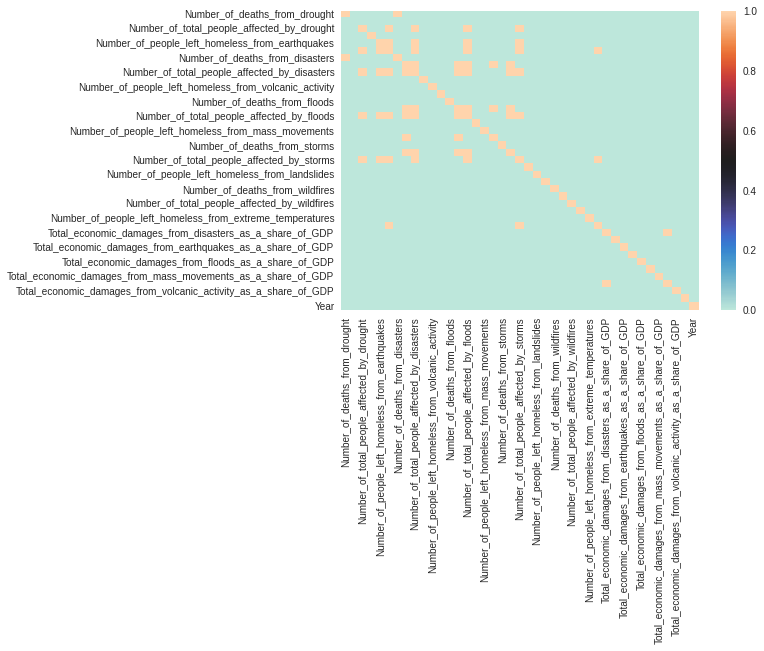

In [155]:
sns.heatmap(df_eco.corr()>0.7, cmap='icefire')

No visible correlation was detected




**17. Focusing on world's inter-correlation total affected from earthquakes, floods, storms and total disasters**

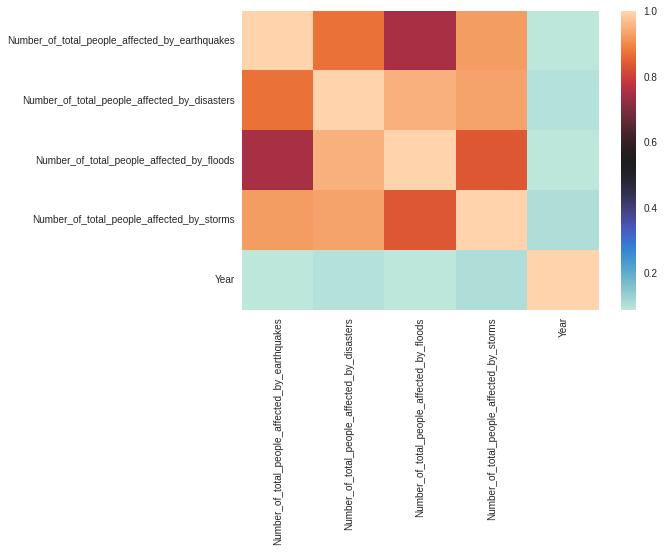

In [156]:
df_di_type=df_natural_disasters.loc[:,df_natural_disasters.columns.str.contains(pat='Number_of_total_people_affected_by_floods|Number_of_total_people_affected_by_earthquakes|Number_of_total_people_affected_by_storms|Number_of_total_people_affected_by_disasters|Year|Entity')].copy()
df_di_type.columns
df_di_type
# sns.pairplot(df_di_type_cy, hue="Entity", size=5)
sns.heatmap(df_di_type.corr(), cmap='icefire')

No high correlation levels were identified

**18. Adding GDP data into the correlation map**

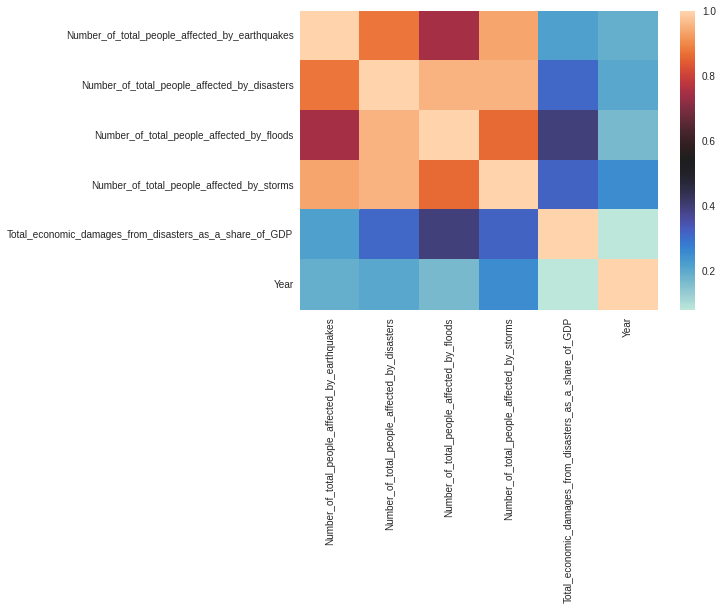

In [157]:
df_di_type=df_natural_disasters.loc[:,df_natural_disasters.columns.str.contains(pat='Total_economic_damages_from_disasters_as_a_share_of_GDP|Number_of_total_people_affected_by_floods|Number_of_total_people_affected_by_earthquakes|Number_of_total_people_affected_by_storms|Number_of_total_people_affected_by_disasters|Year|Entity')].copy()
df_di_type.columns
df_di_type_c=df_di_type[df_di_type.Entity.isin(['Africa', 'Asia', 'Australia','North America','South America','Europe', 'Oceania'])]
df_di_type_cy=df_di_type_c[df_di_type_c.Year.isin([1960, 1970, 1980, 1990, 2000, 2010])]
df_di_type_cy
df_di_type_cy.columns
# sns.pairplot(df_di_type_cy, hue="Entity", size=5)
sns.heatmap(df_di_type_cy.corr(), cmap='icefire')

**19. Continental view of the effect of drought, earthquakes, floods and total disasters on homelessness and GDP**

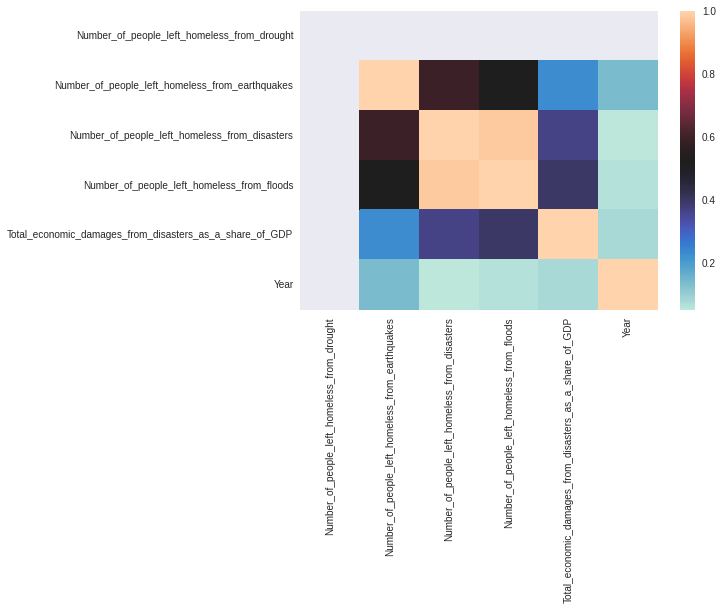

In [158]:
df_di_type=df_continents_1960_2010.loc[:,df_continents_1960_2010.columns.str.contains(pat='Total_economic_damages_from_disasters_as_a_share_of_GDP|Number_of_people_left_homeless_from_floods|Number_of_people_left_homeless_from_drought|Number_of_people_left_homeless_from_earthquakes|Number_of_people_left_homeless_from_disasters|Year|Entity')].copy()
sns.heatmap(df_di_type.corr(), cmap='icefire')

**20. Broad General GDP Pairing**\
*Disasters (in the below order) were plotted as functions of continents and income levels to identify GDP correlations*
- Disasters by Continents
- Disasters by Income
- Drought and Continents
- Drought and Income
- Earthquakes by Continents
- Earthquakes and Income
- Volcanic activity by Continents
- Volcanic activity and Income
- Floods by Continents
- Floods and Income
- Storms by Continents
- Storms by Income
- Wildfires by Continents 
- Wildfires and Income
- Extreme temperature by Continents
- Extreme temperature and Income

**However, the results did not point at any outstanding correlation, at this point the conclusion is that the very high level observation of a decade periods Vs world or continents does not allow for the required granularity to deduct any inter-relation**


# **Pairing**

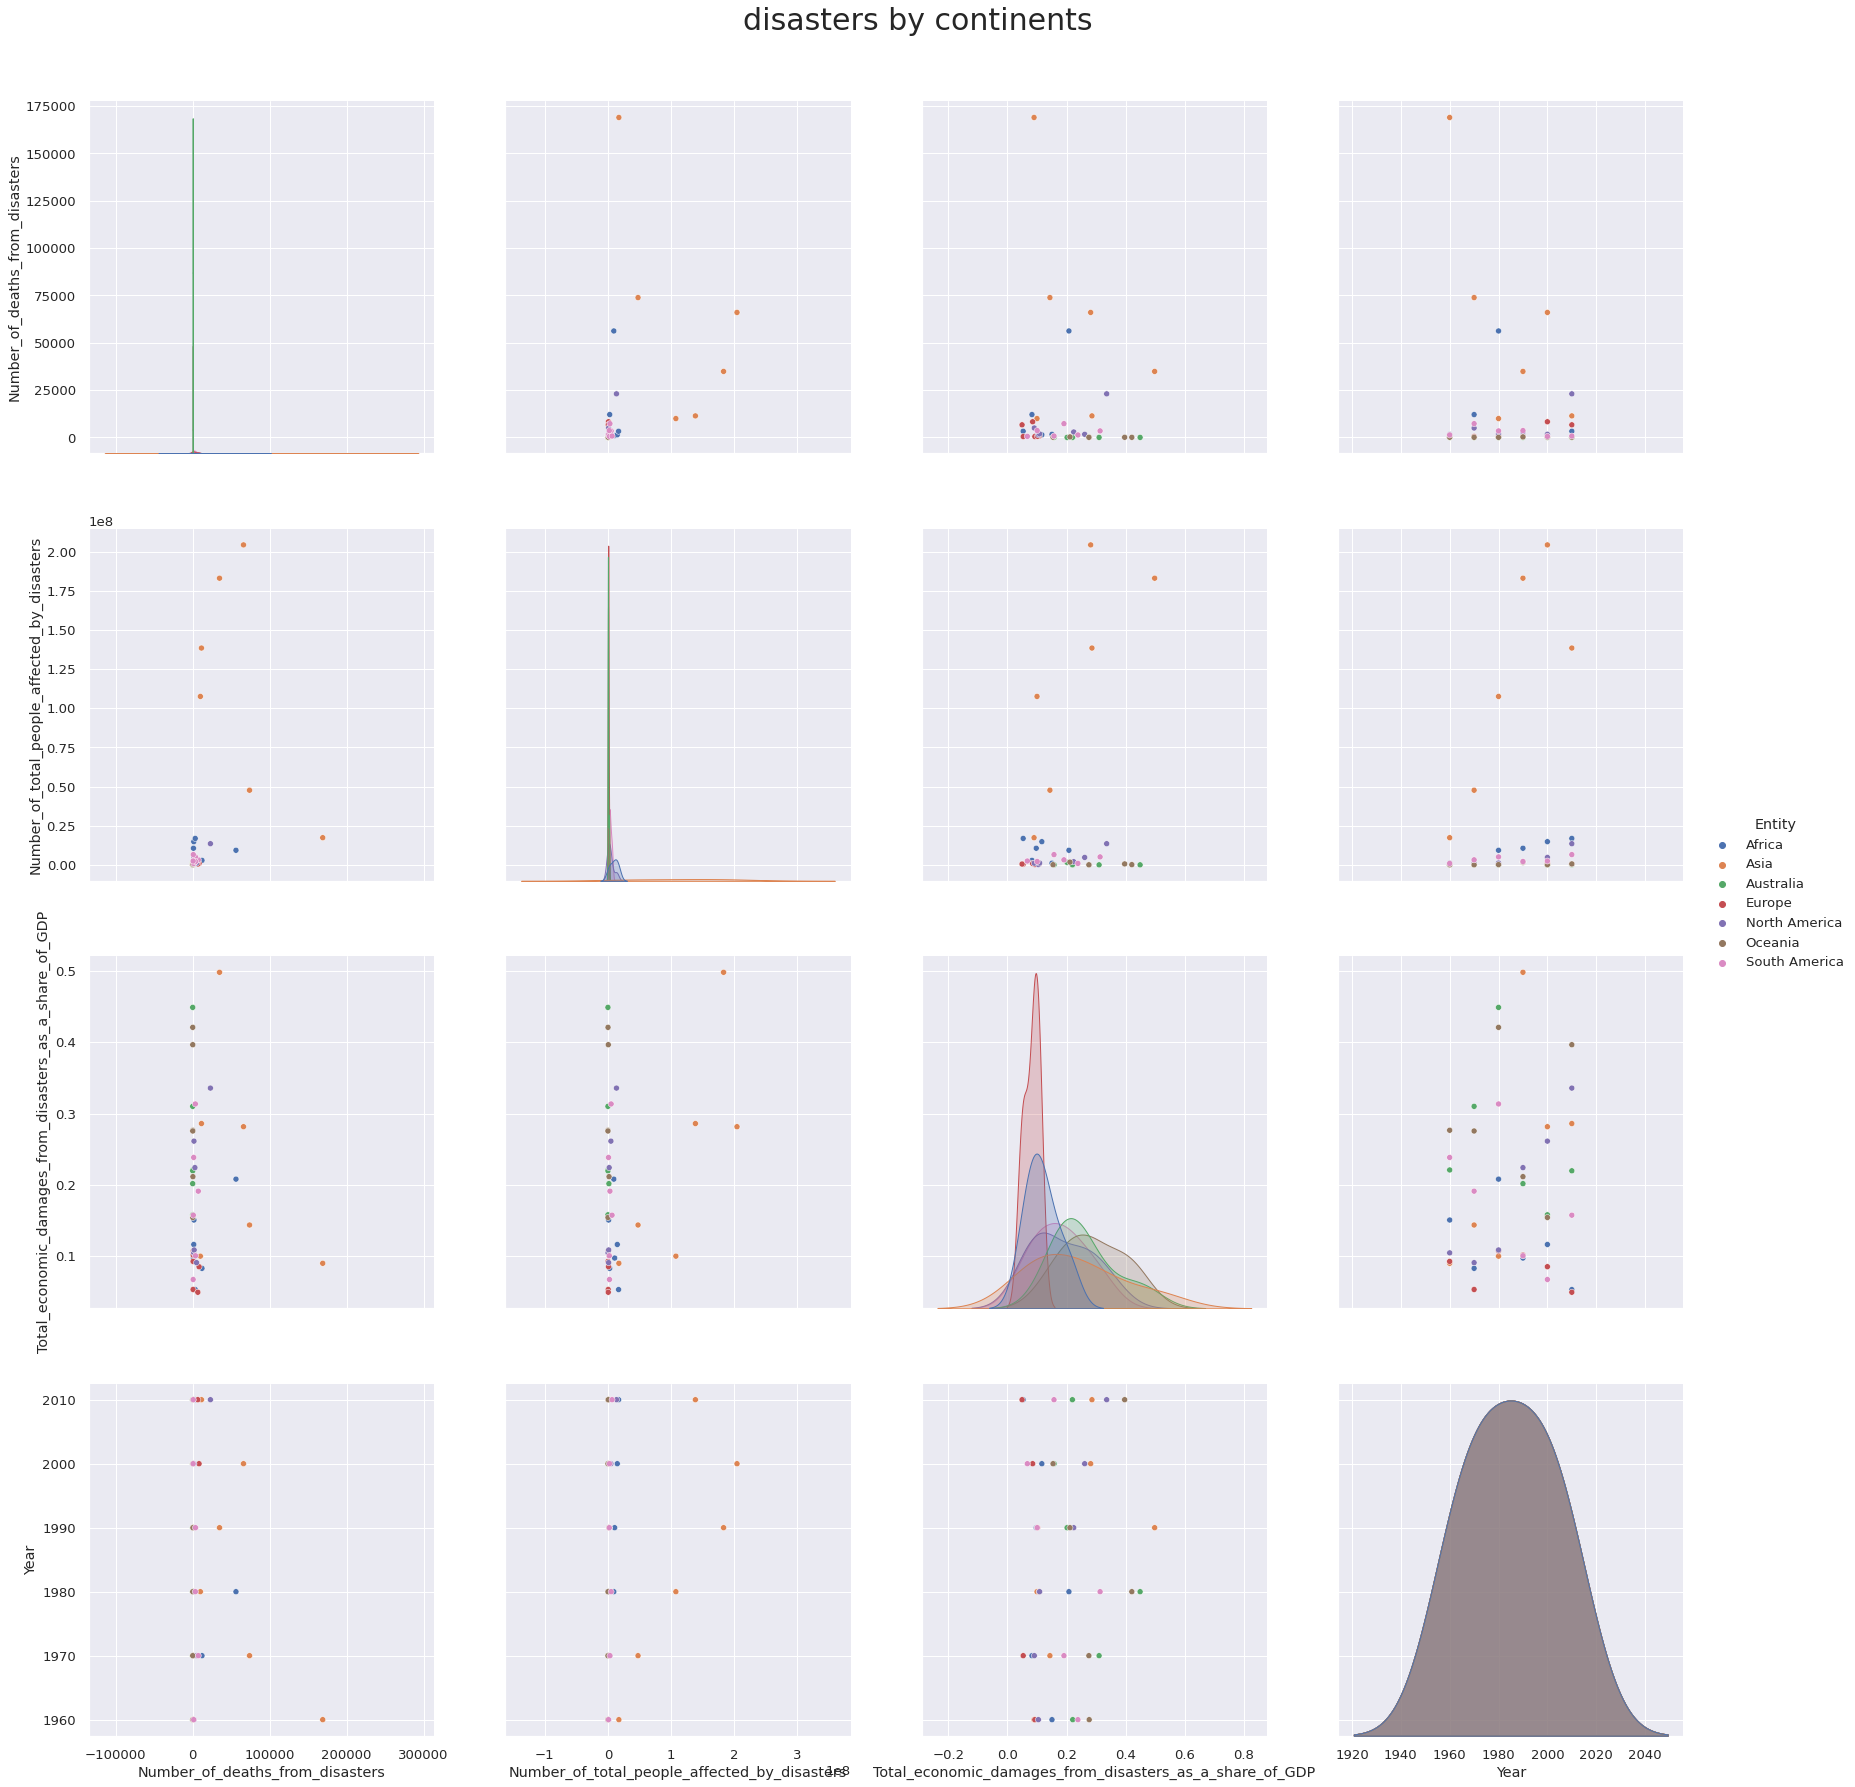

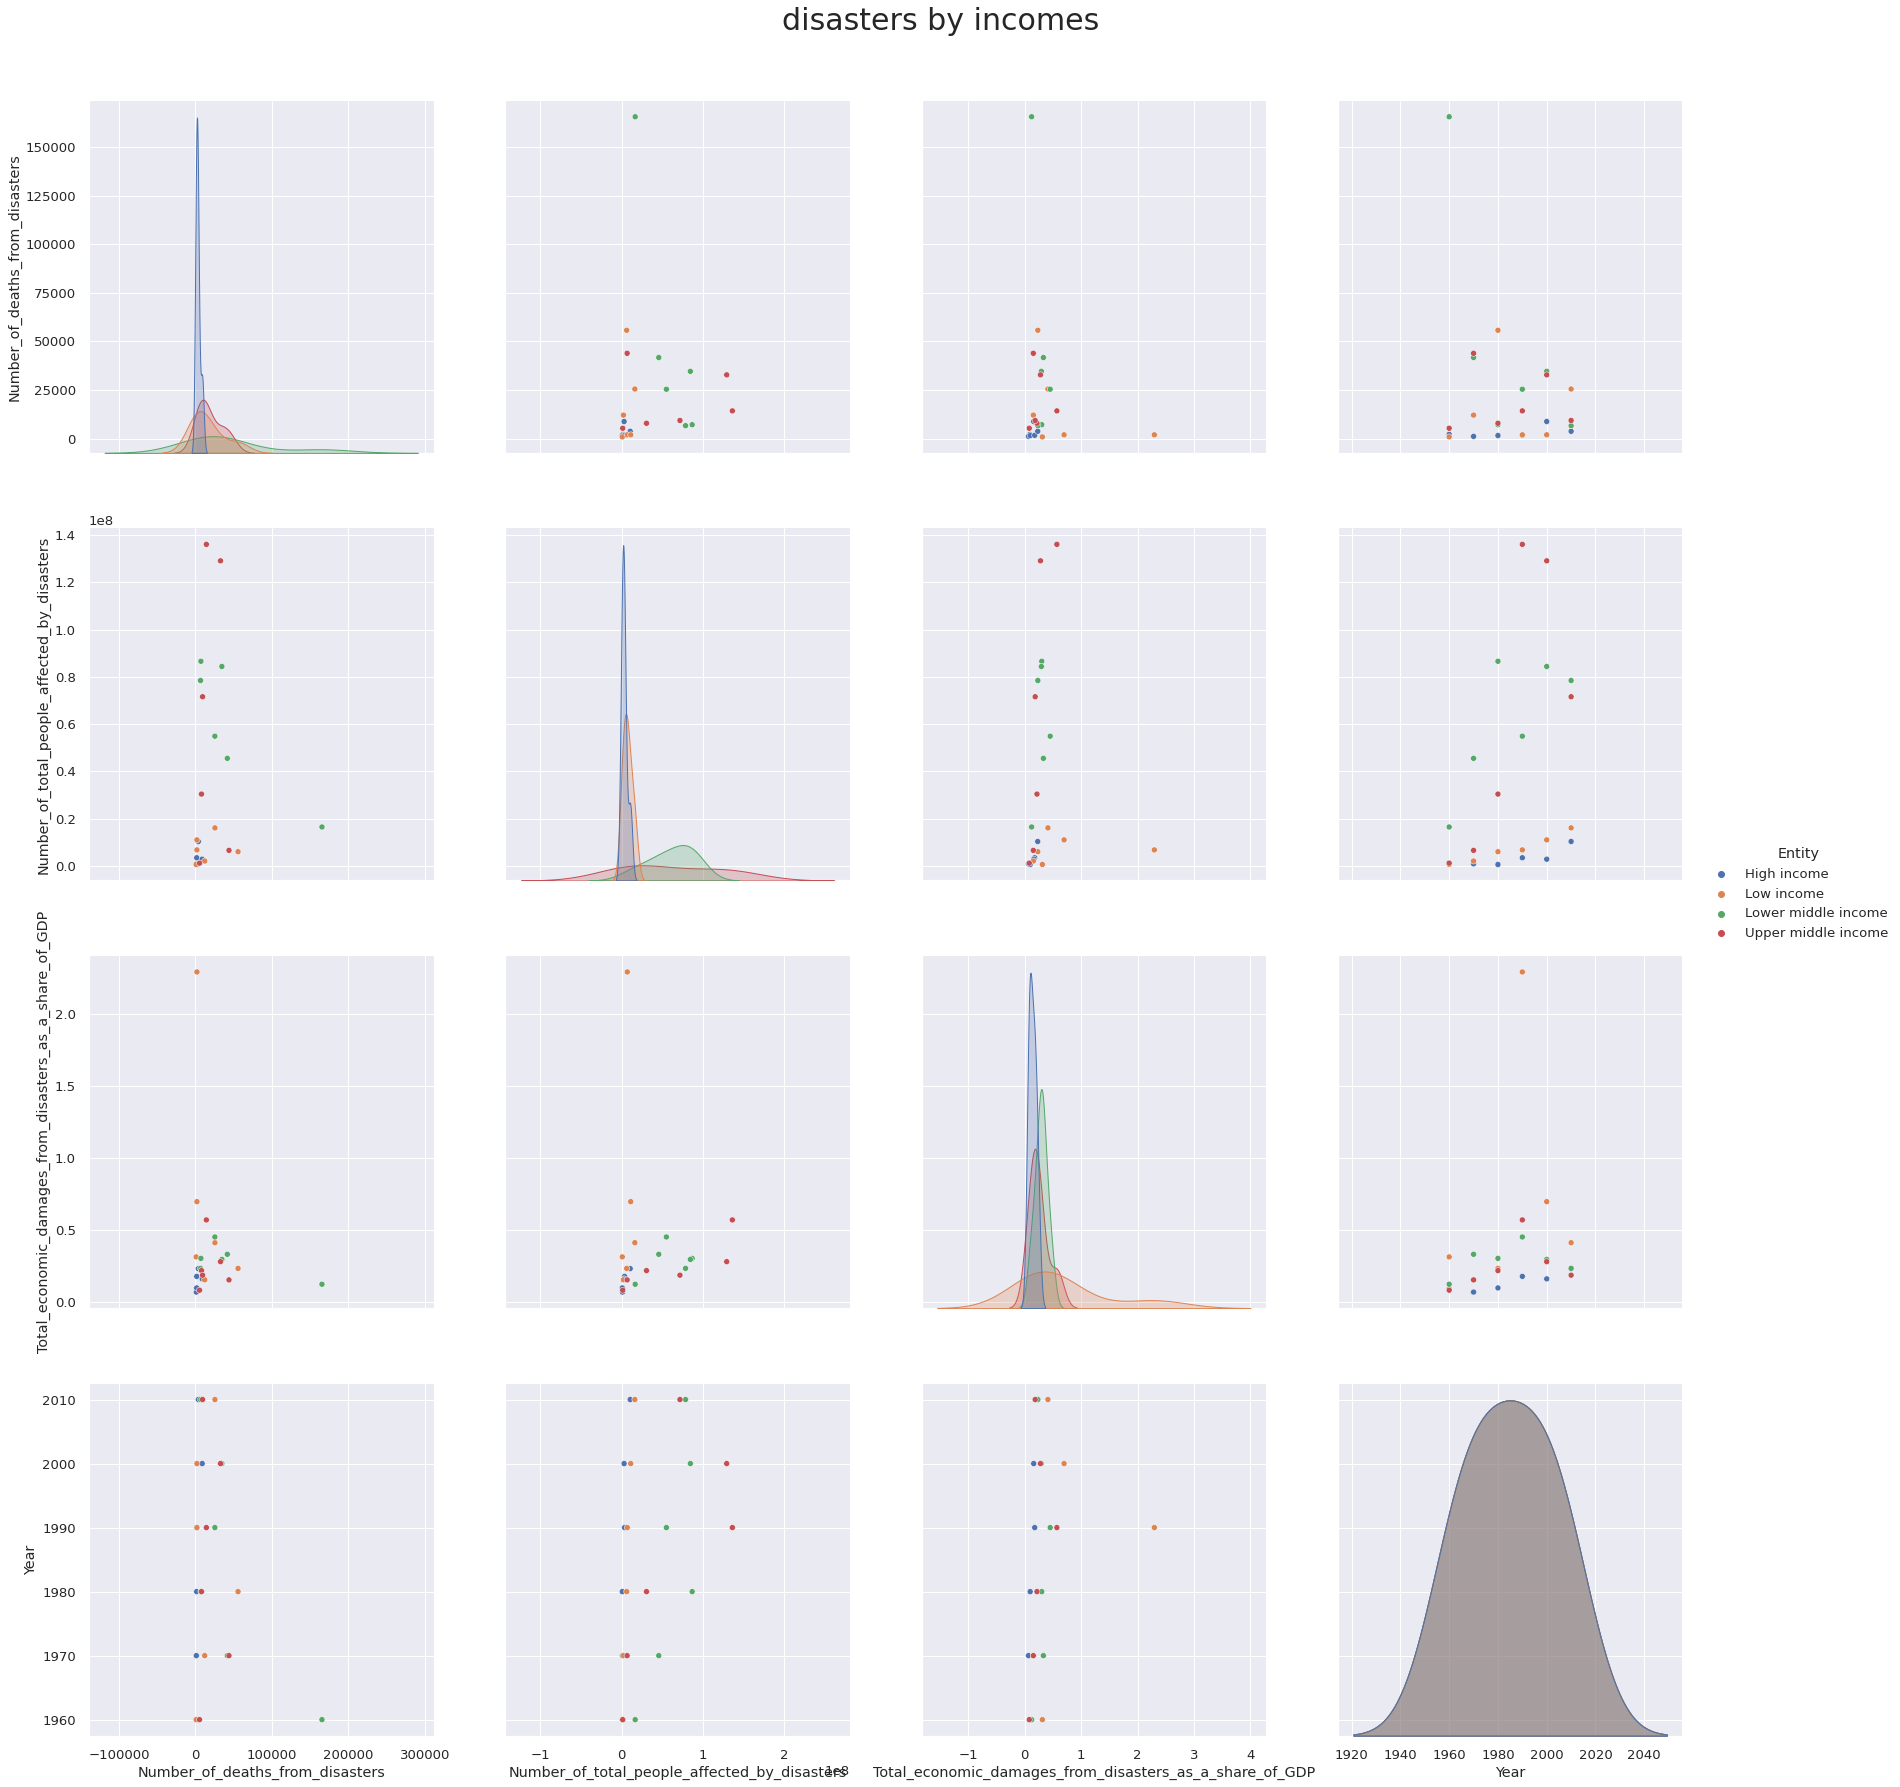

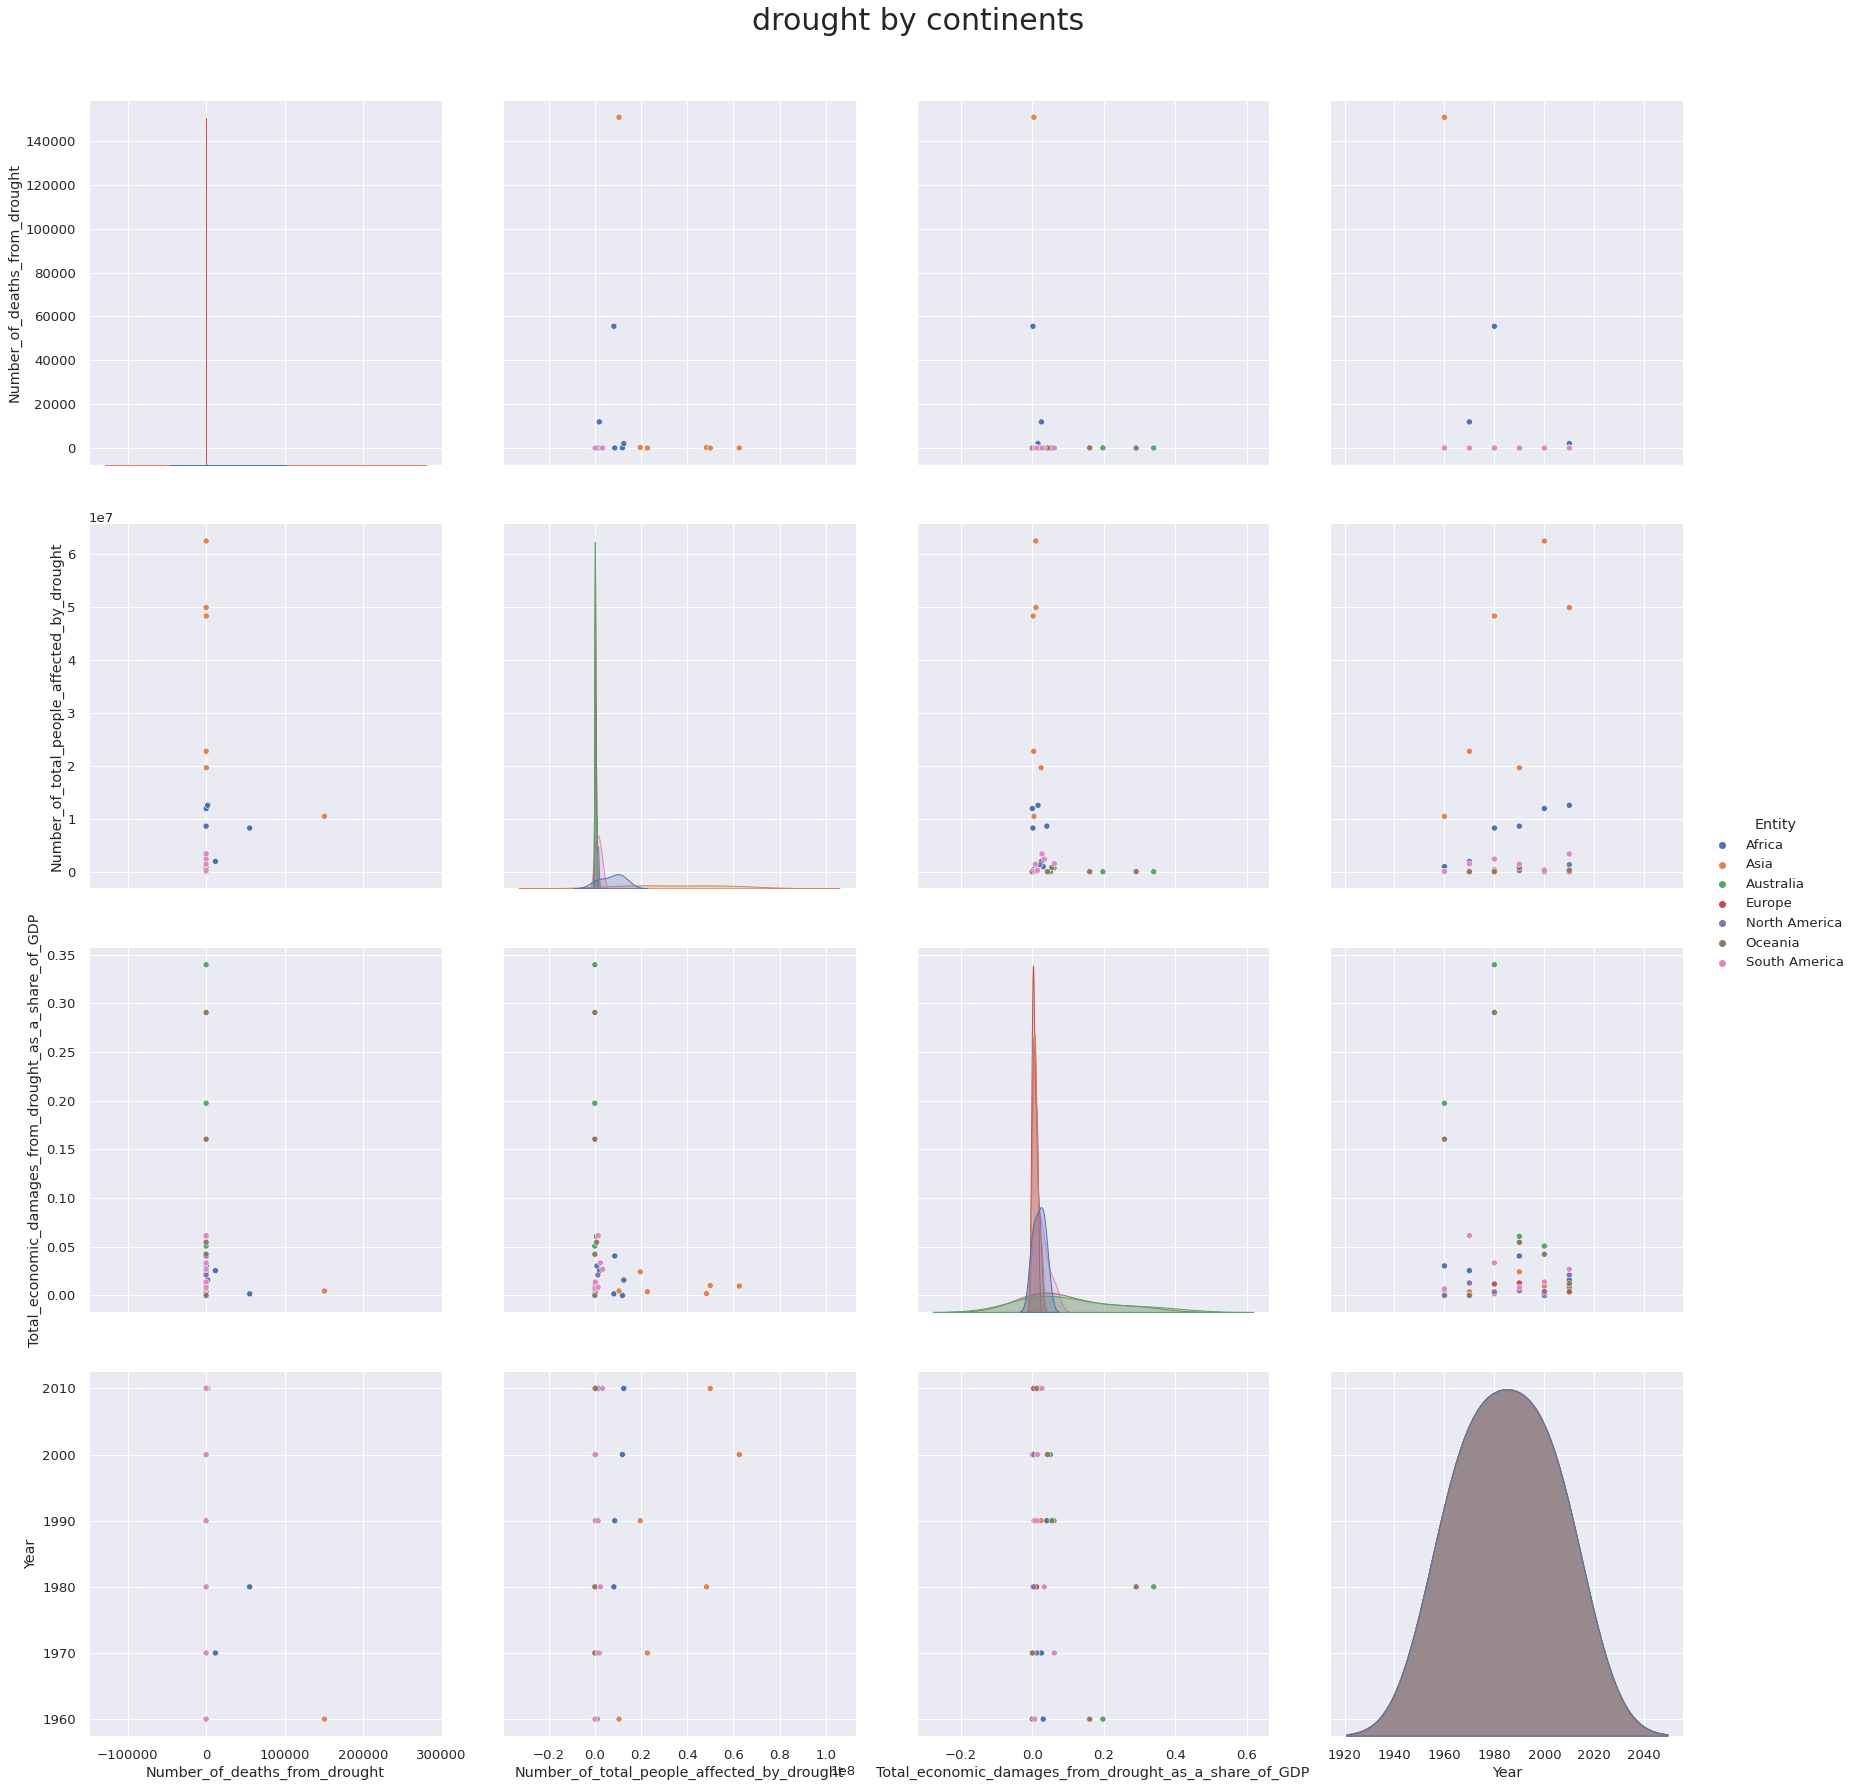

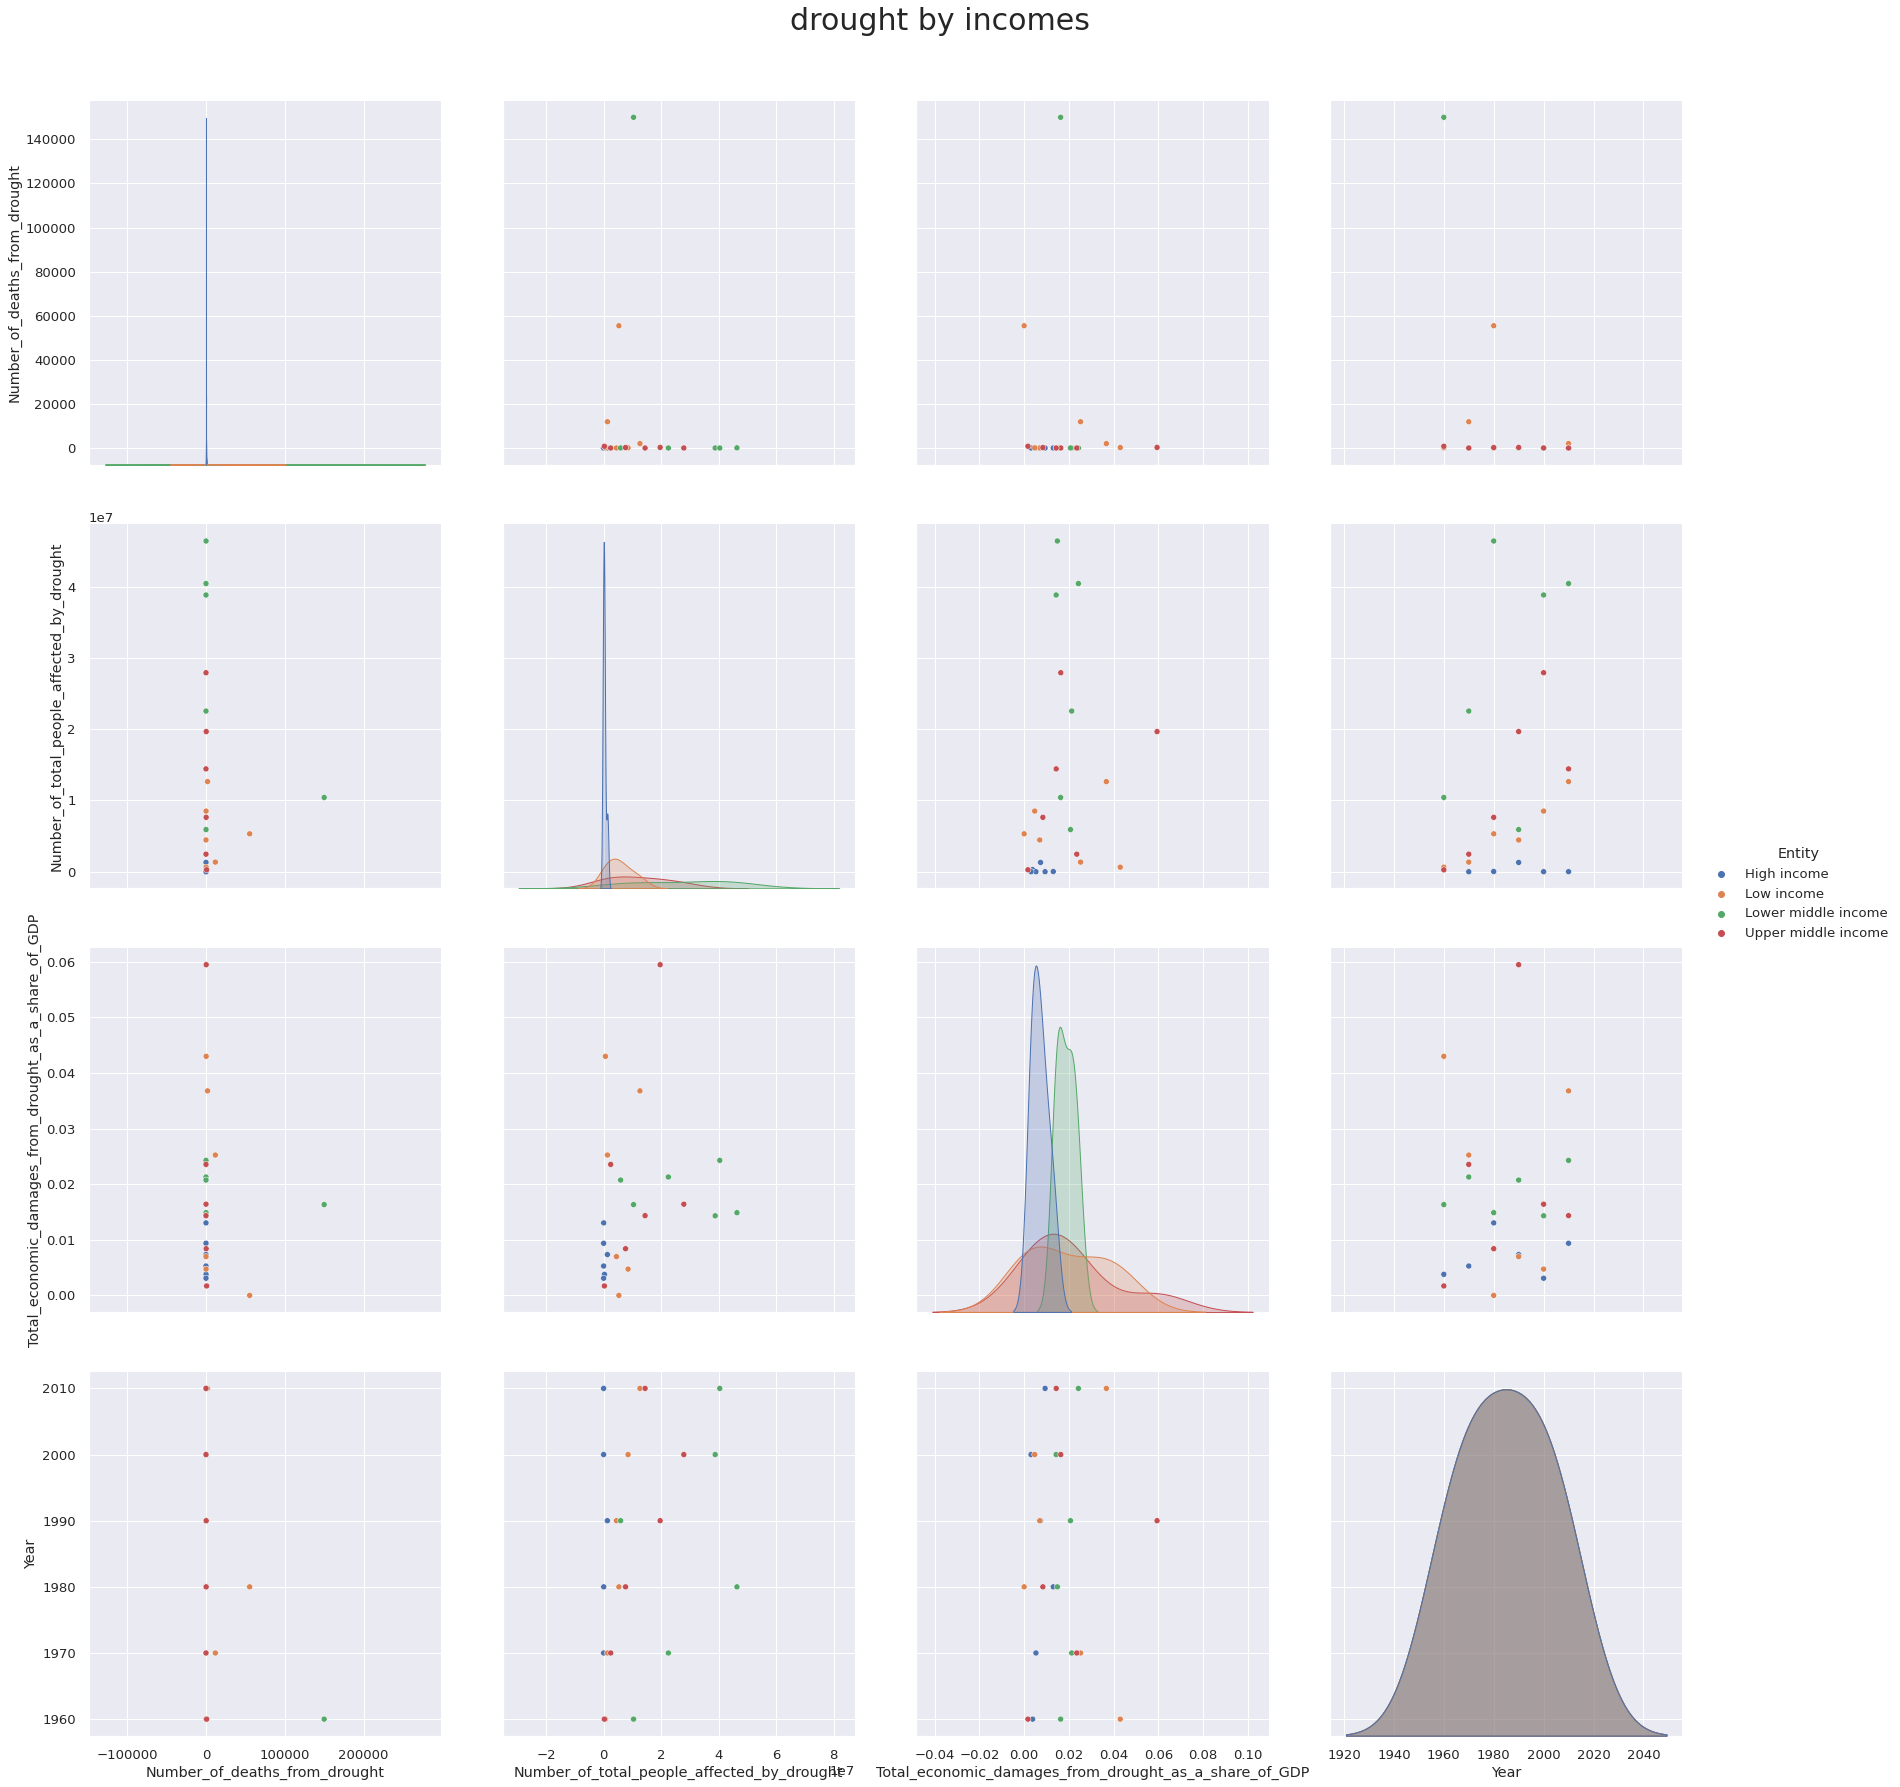

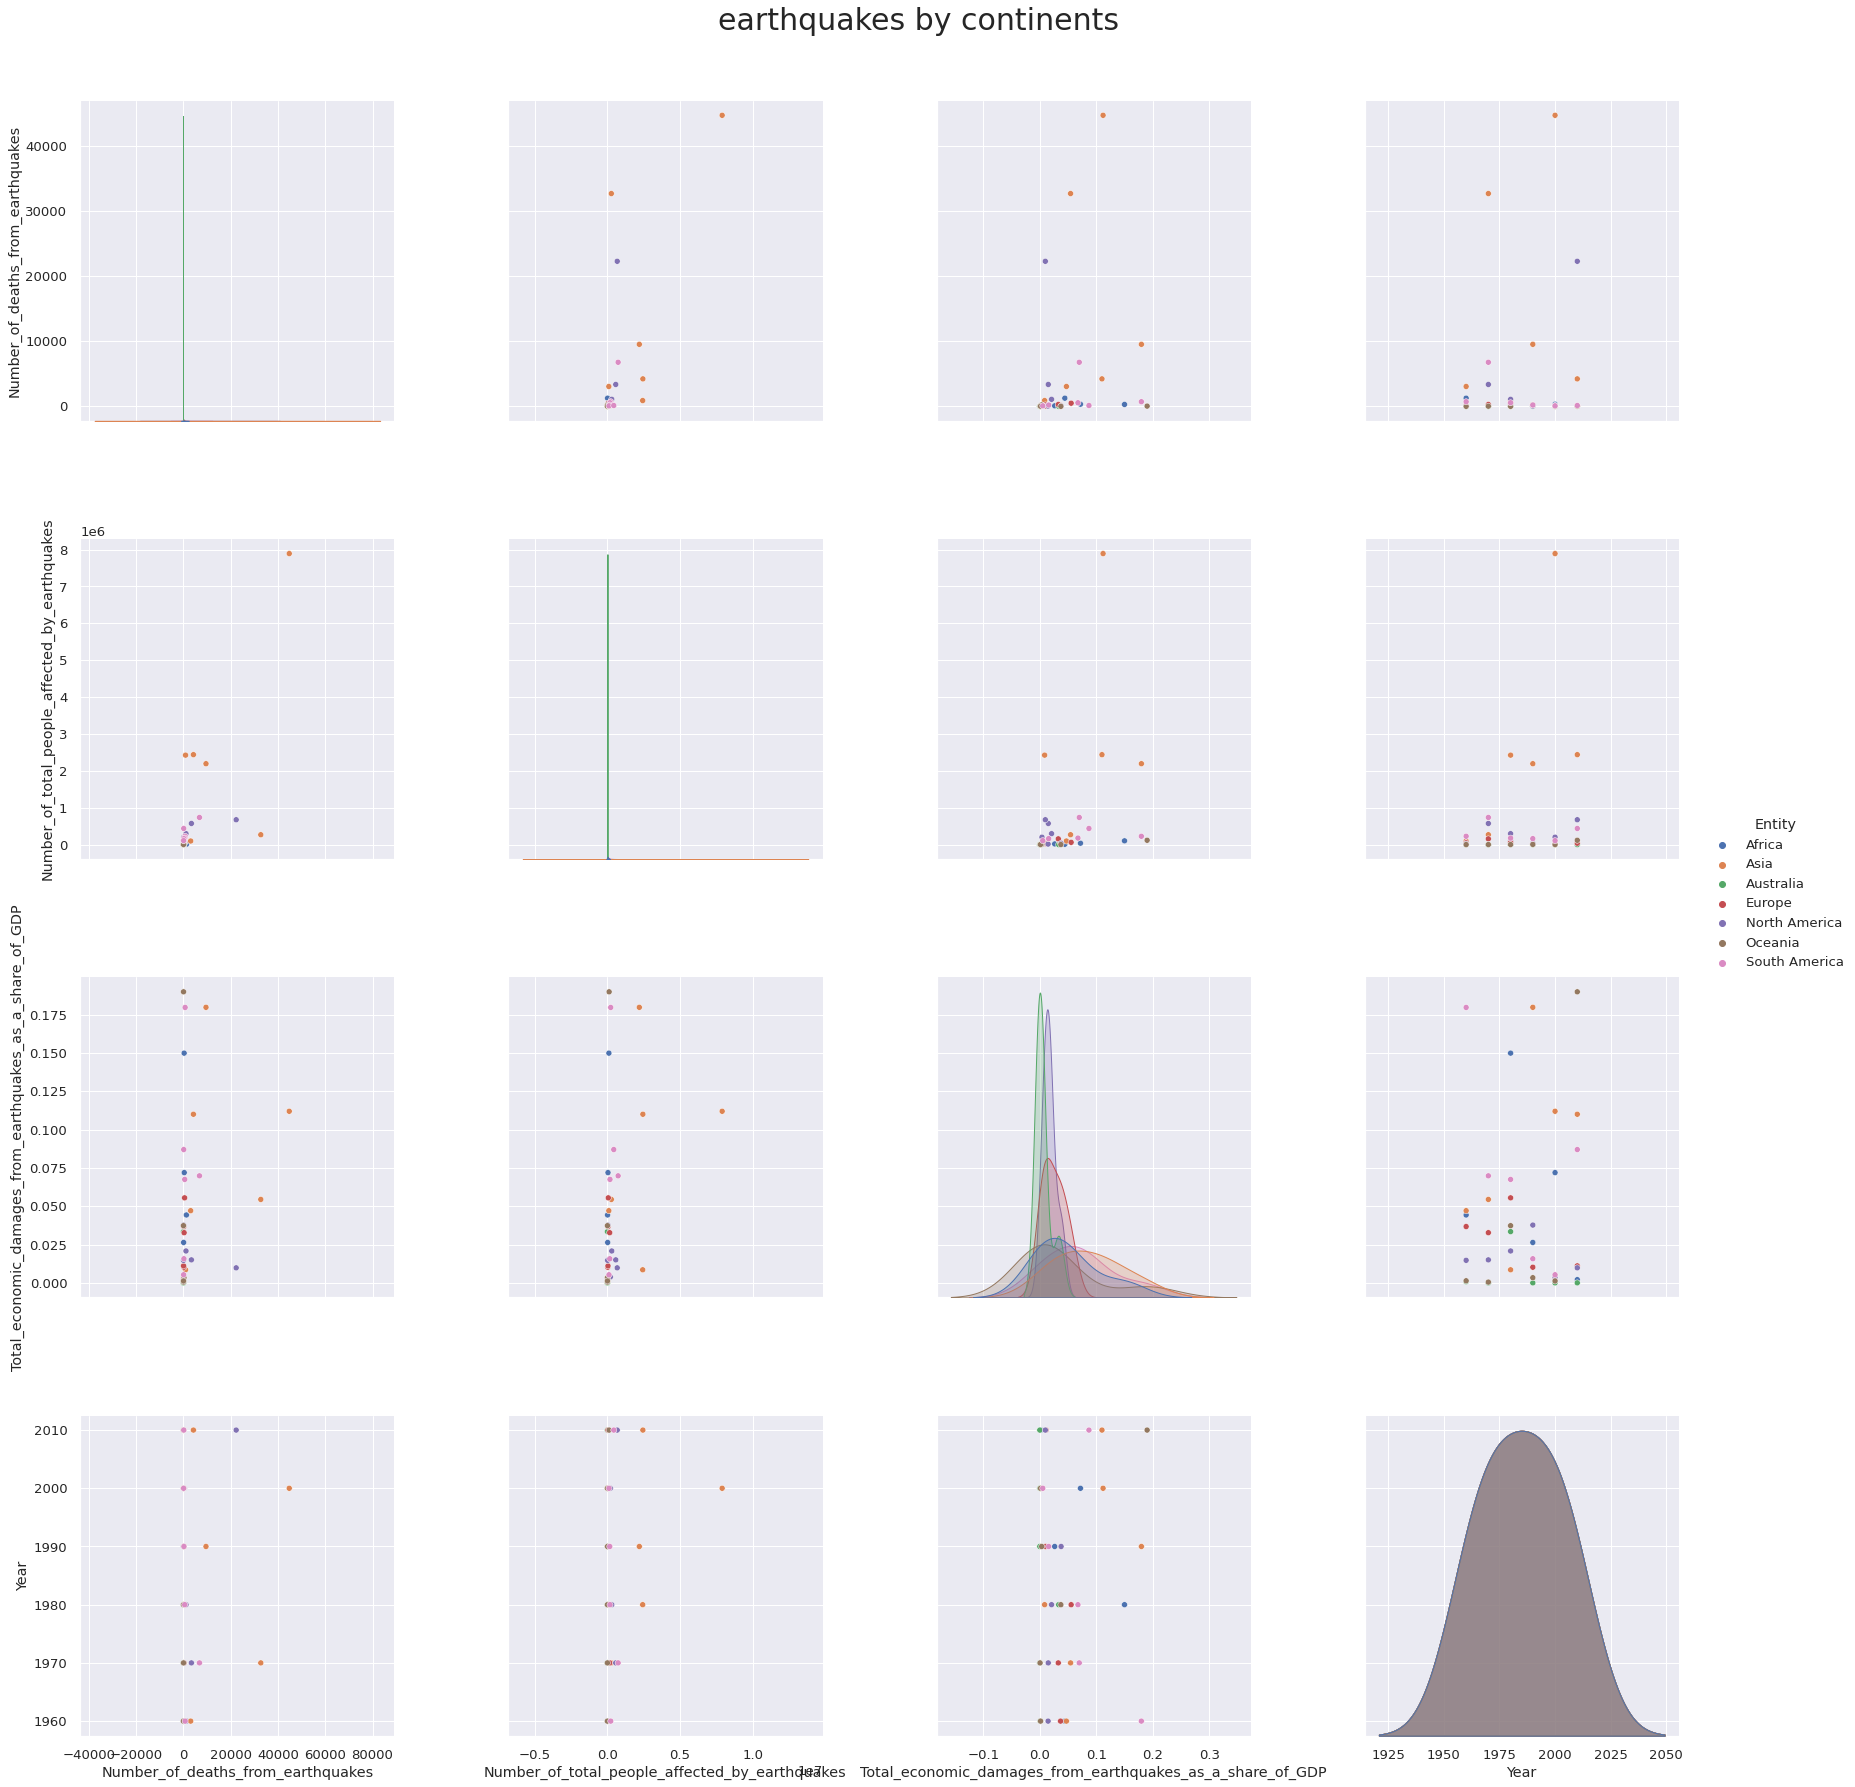

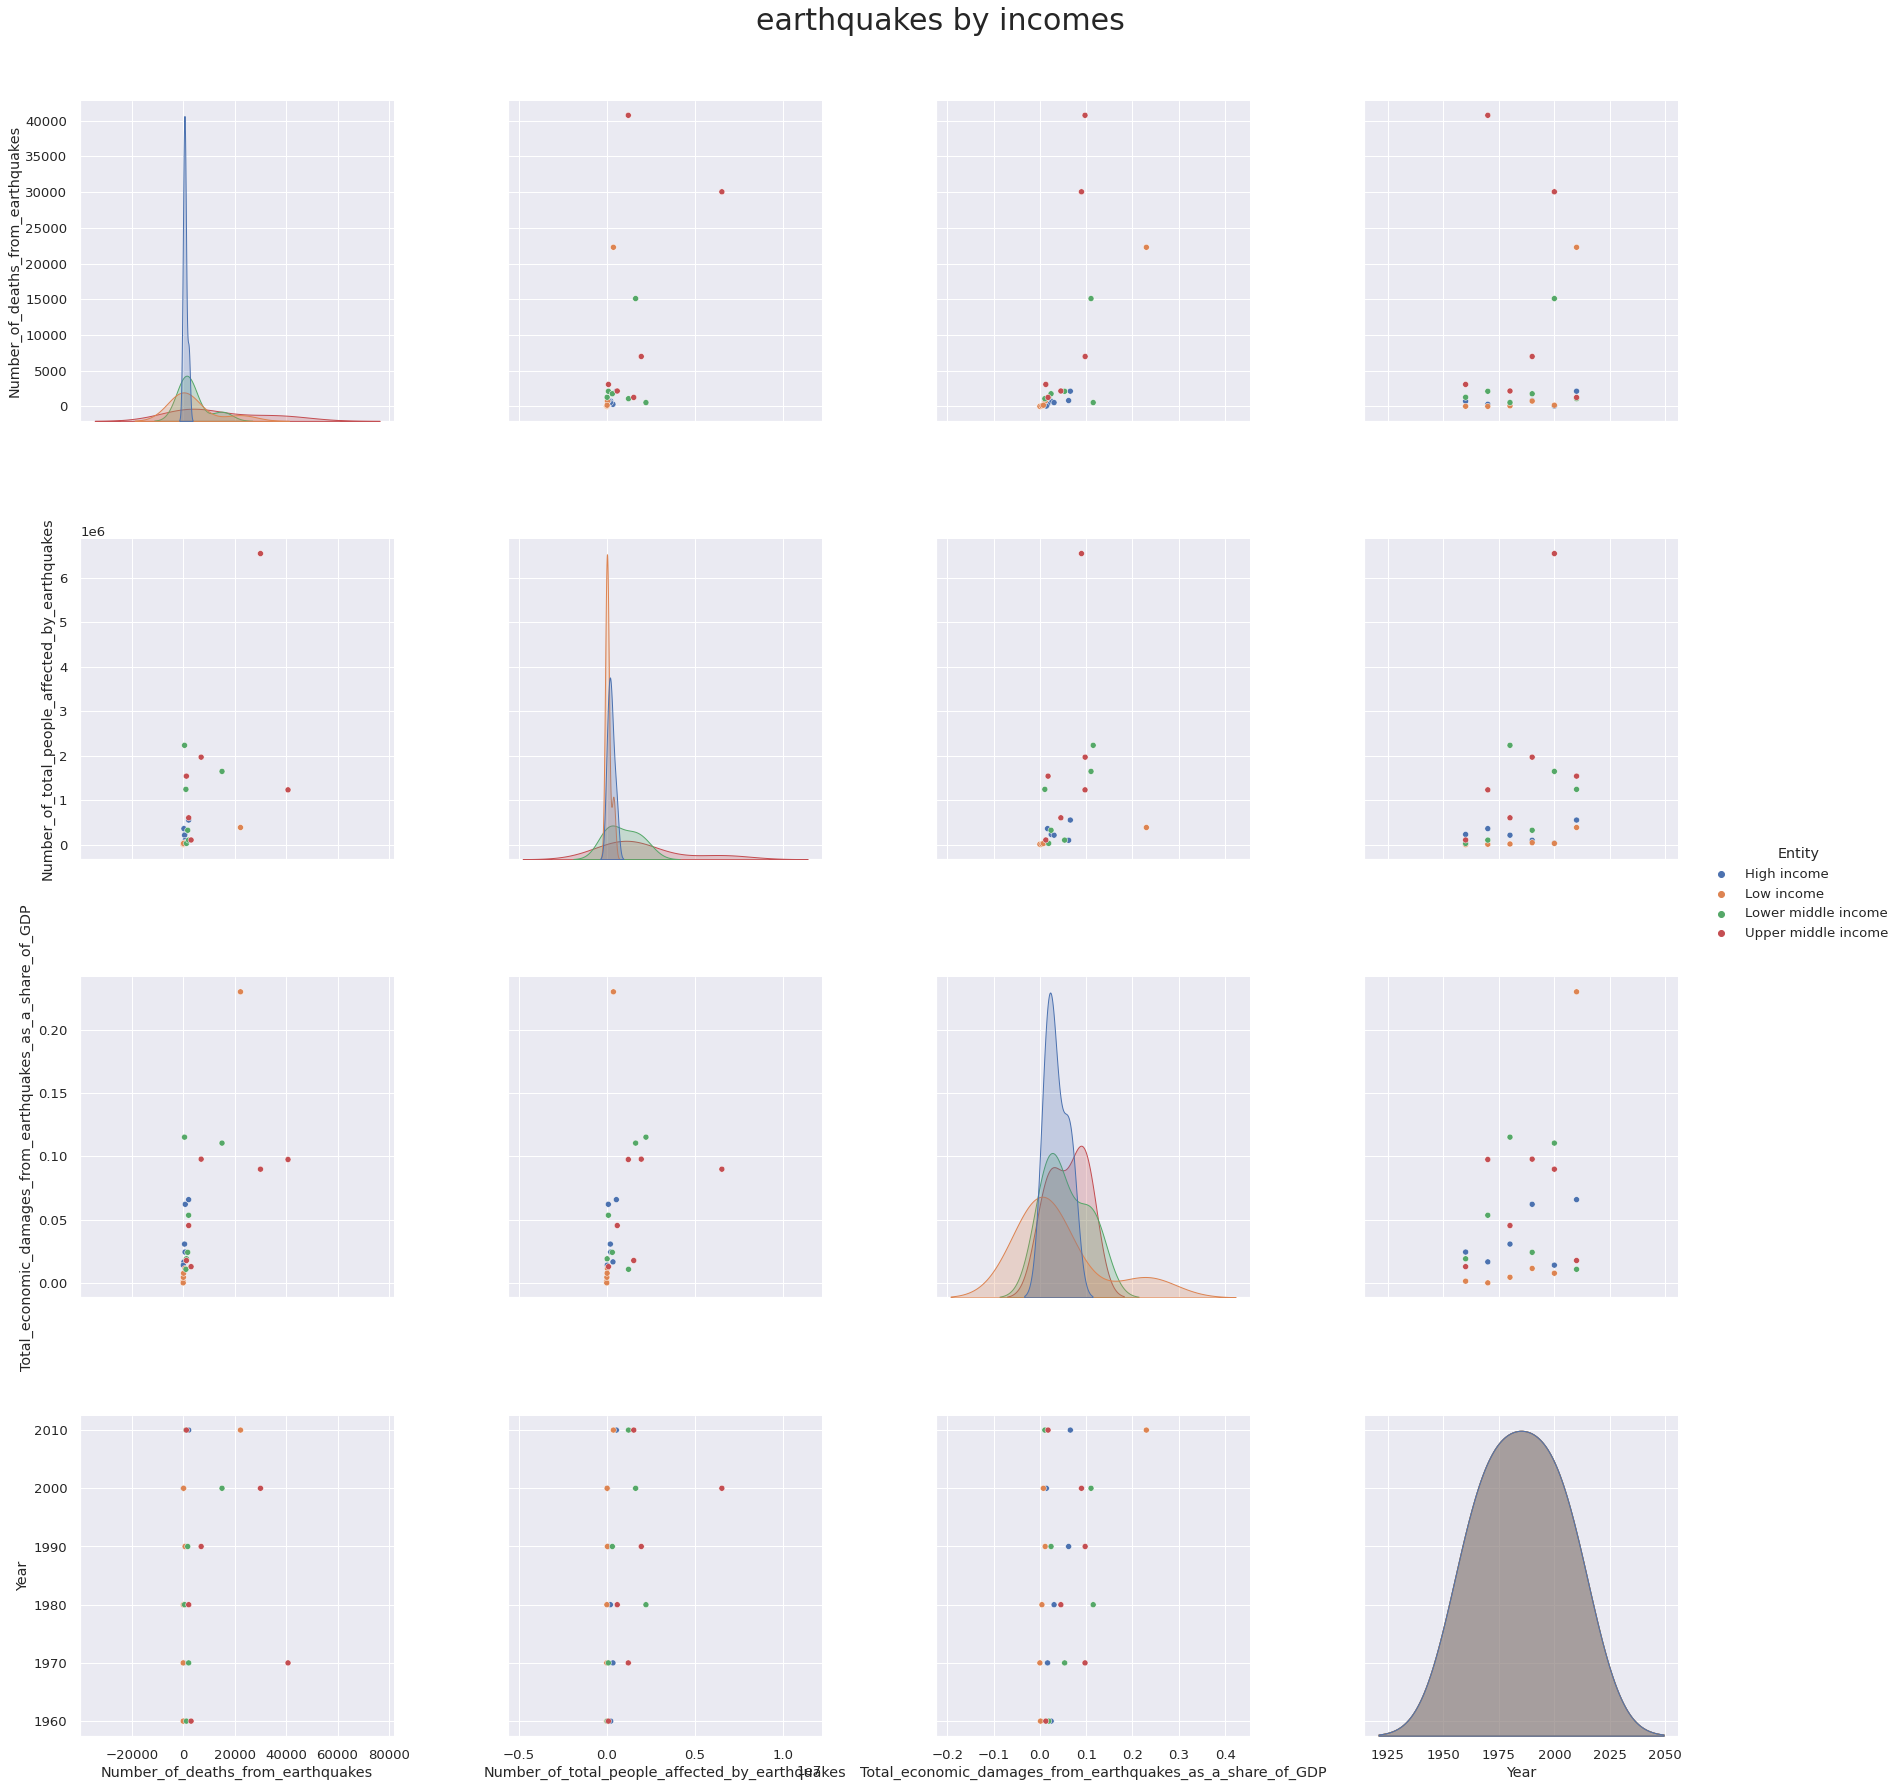

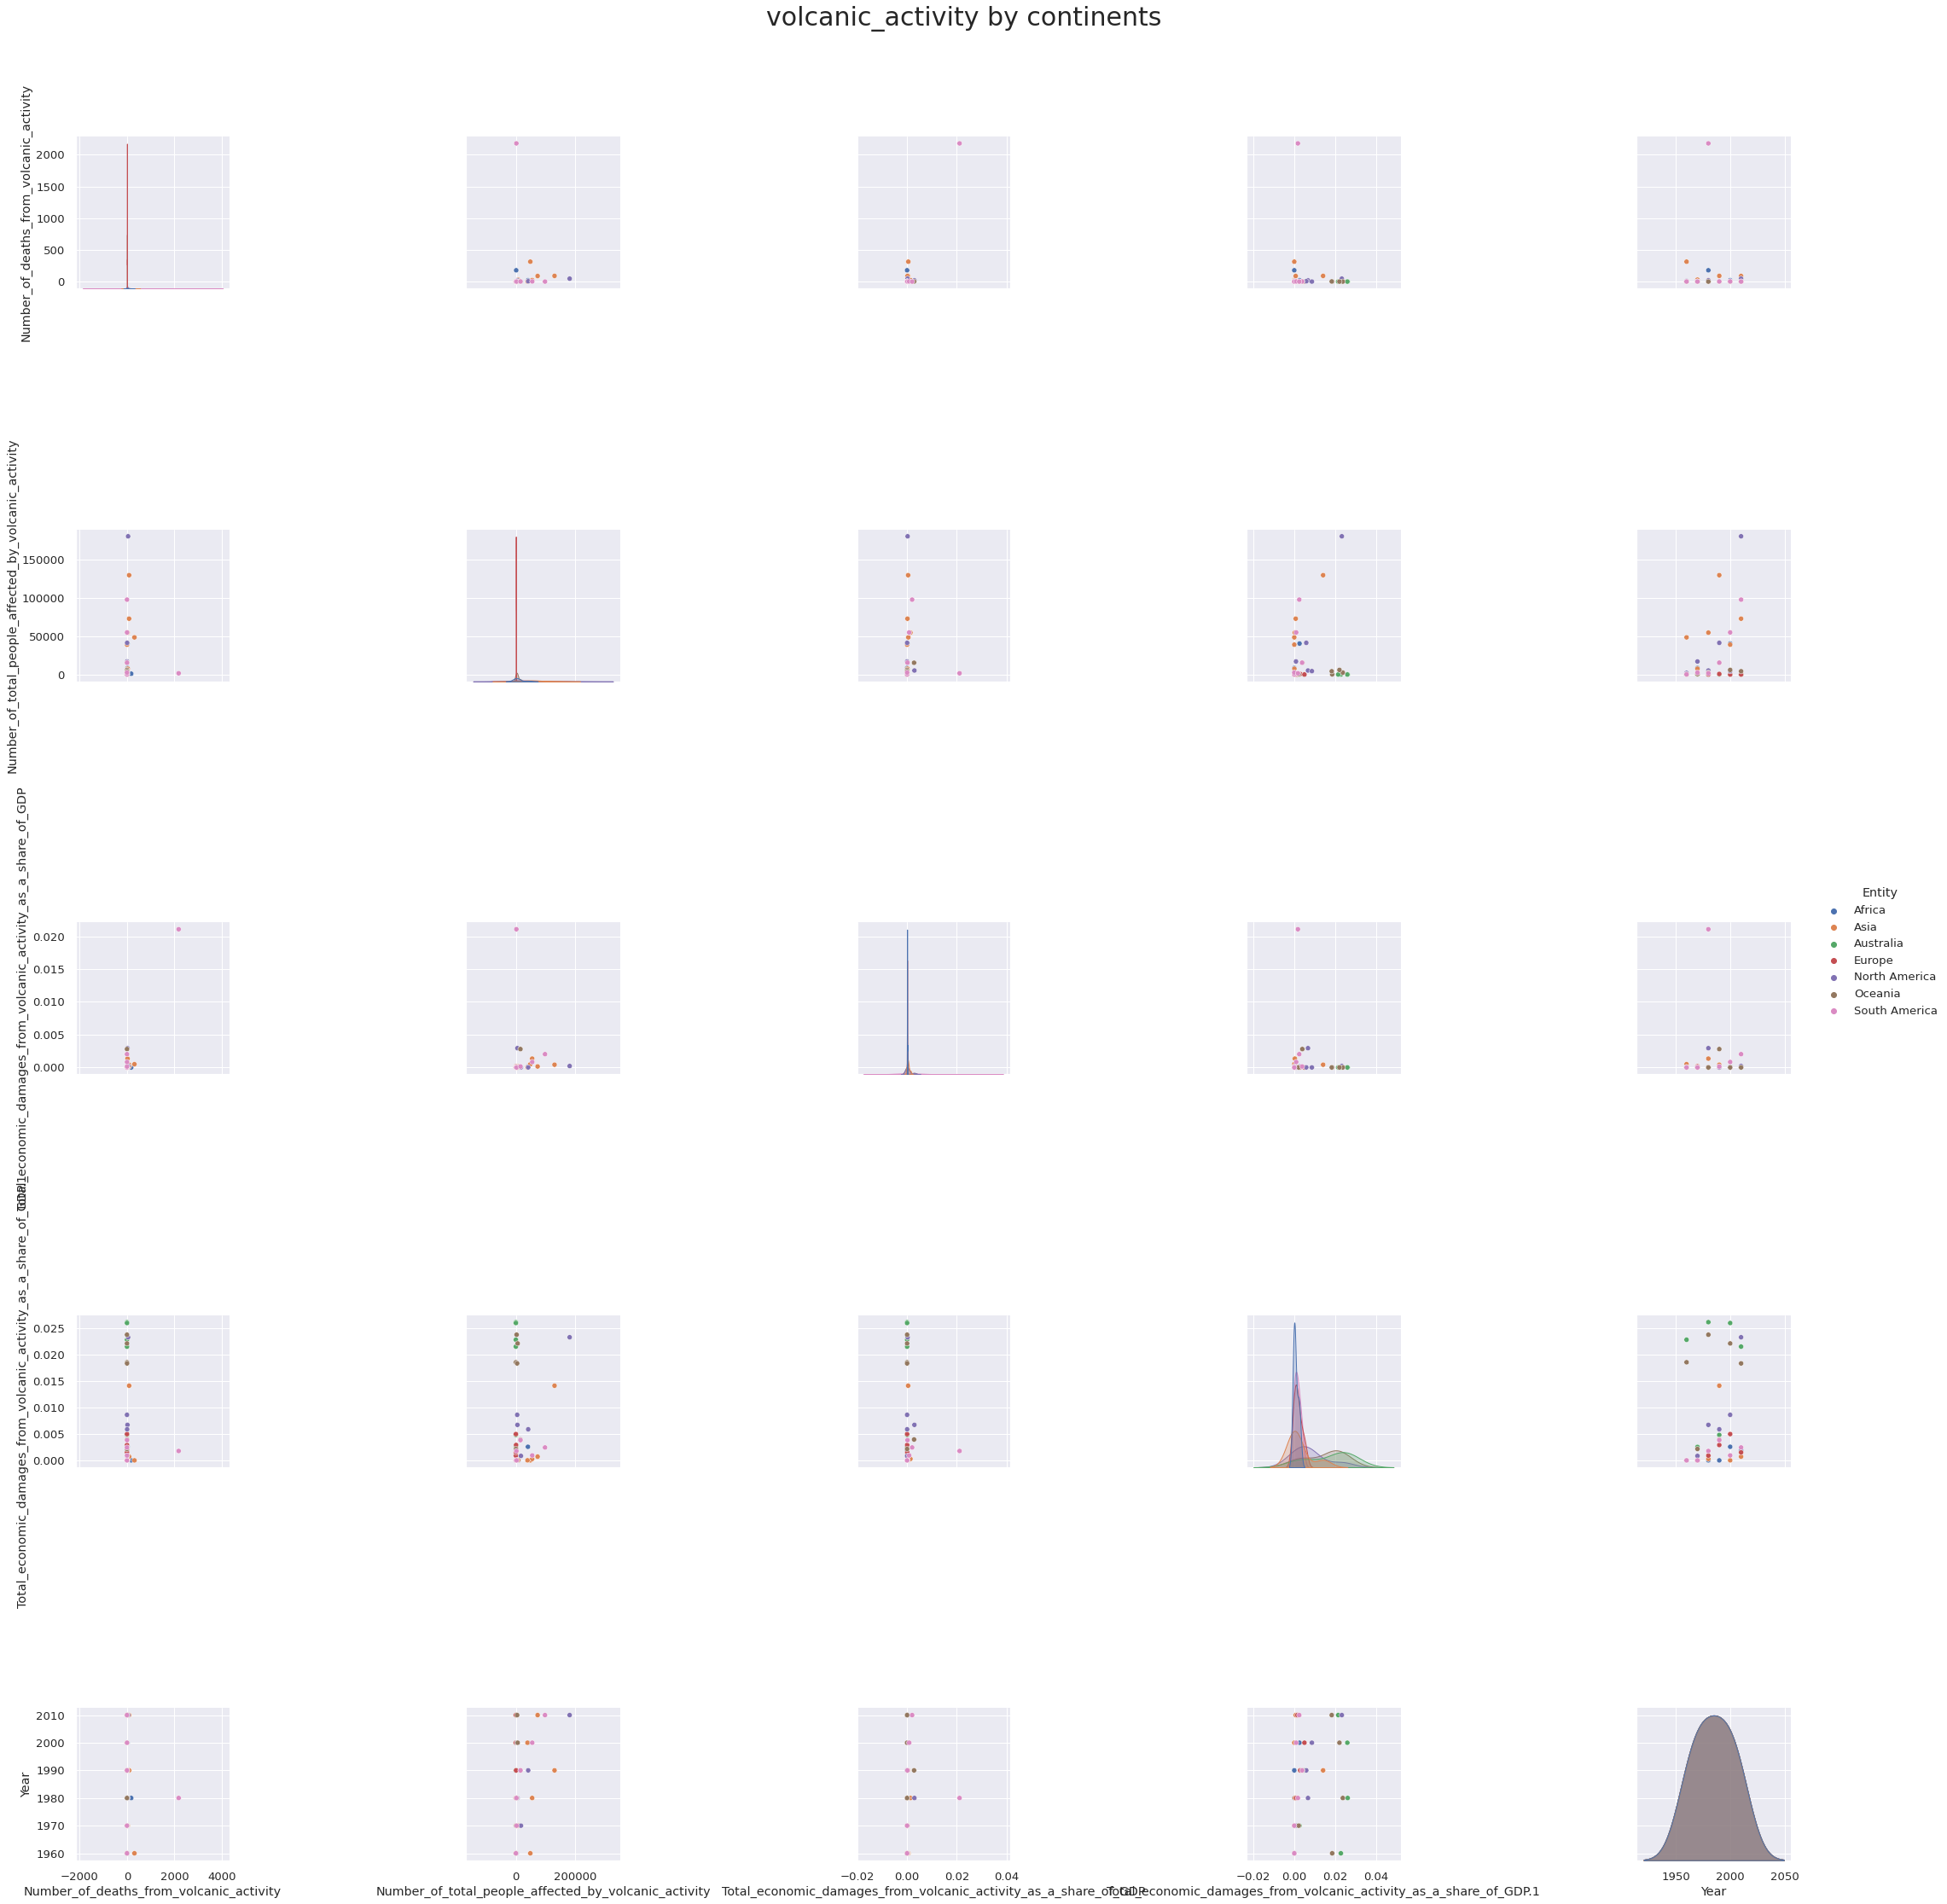

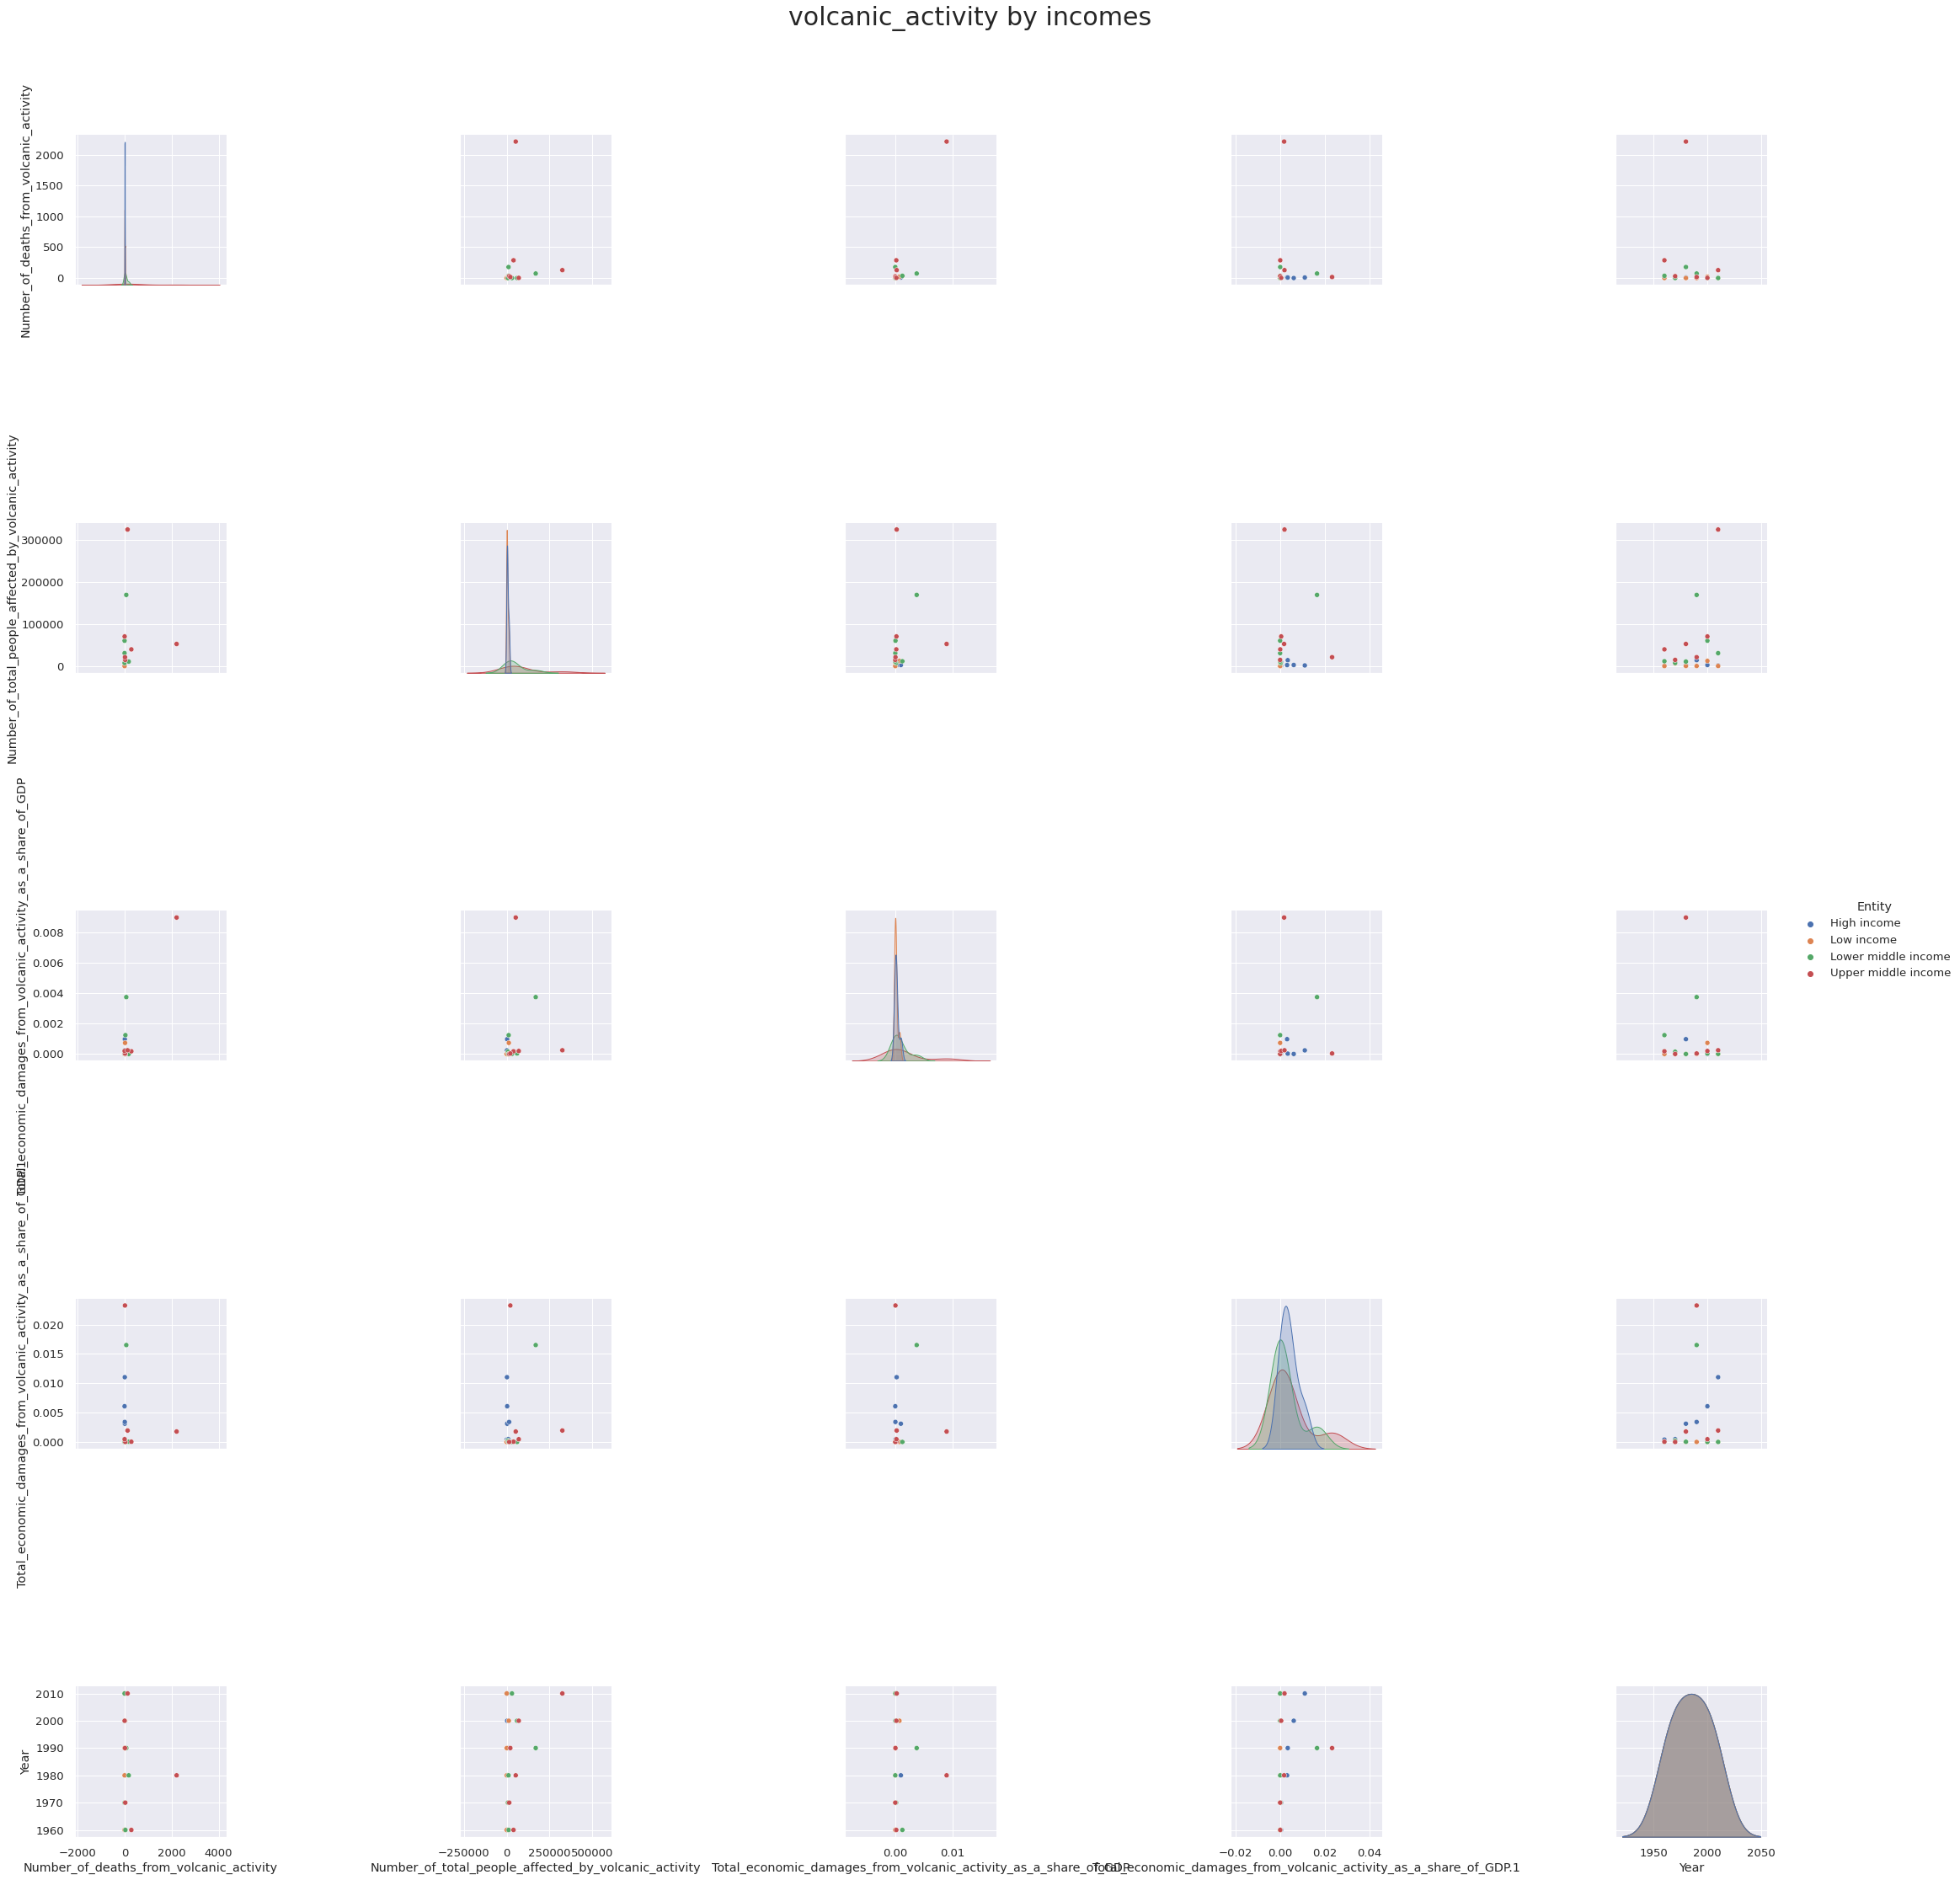

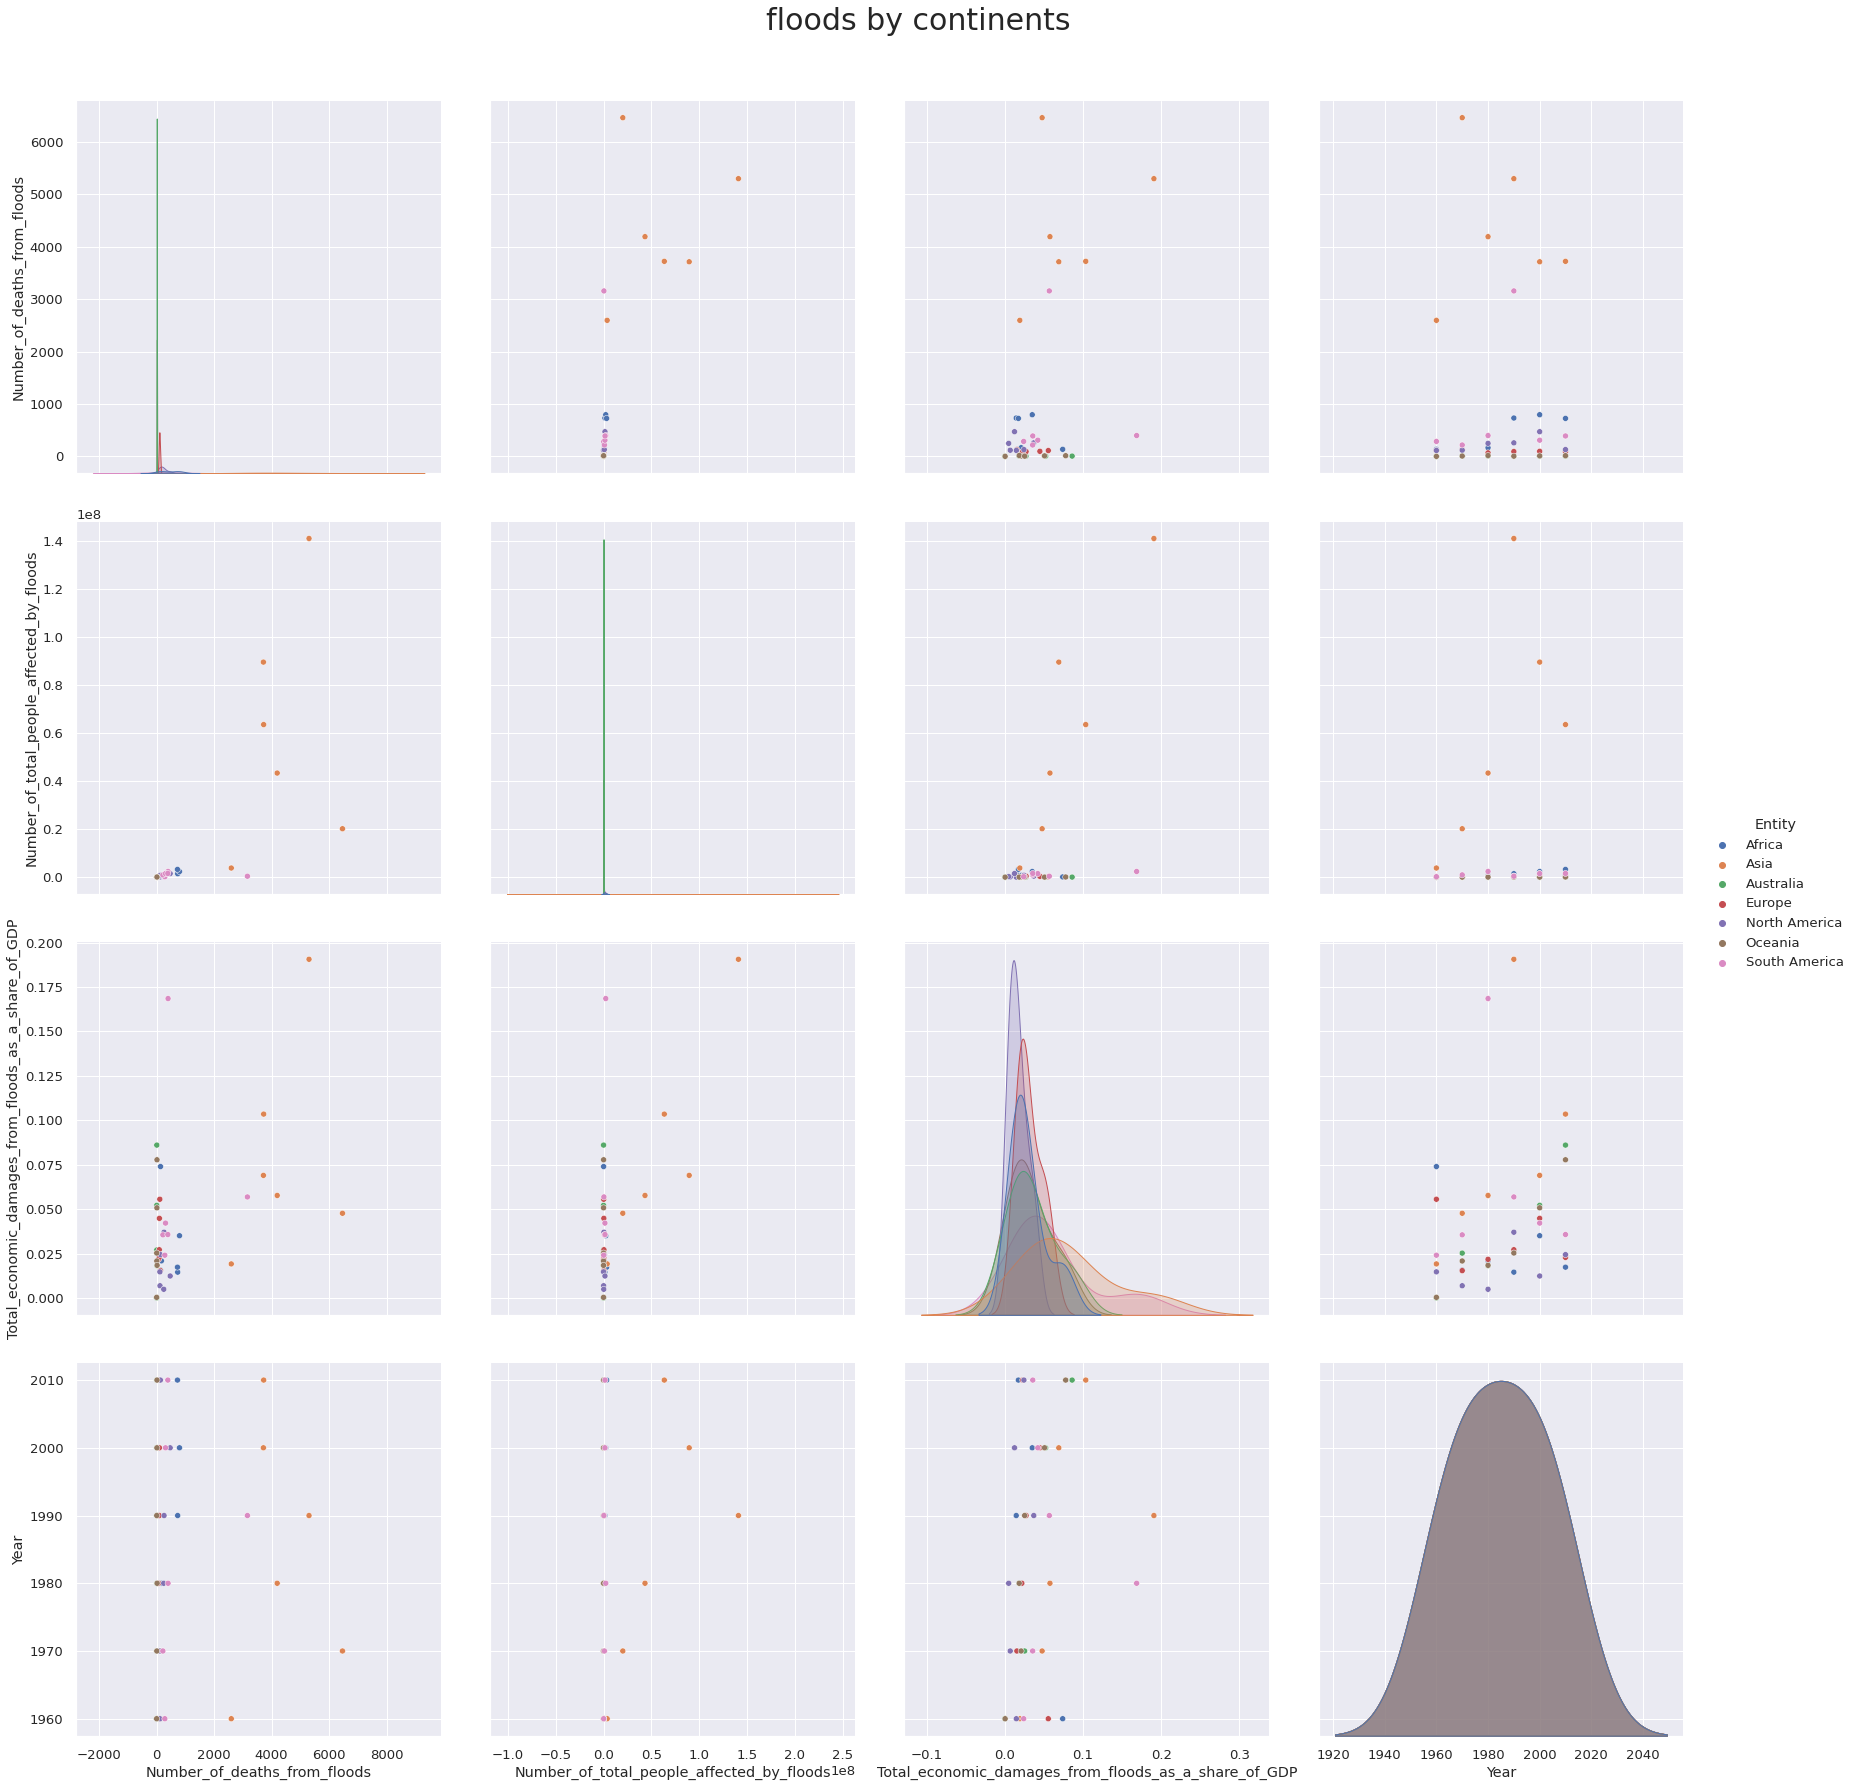

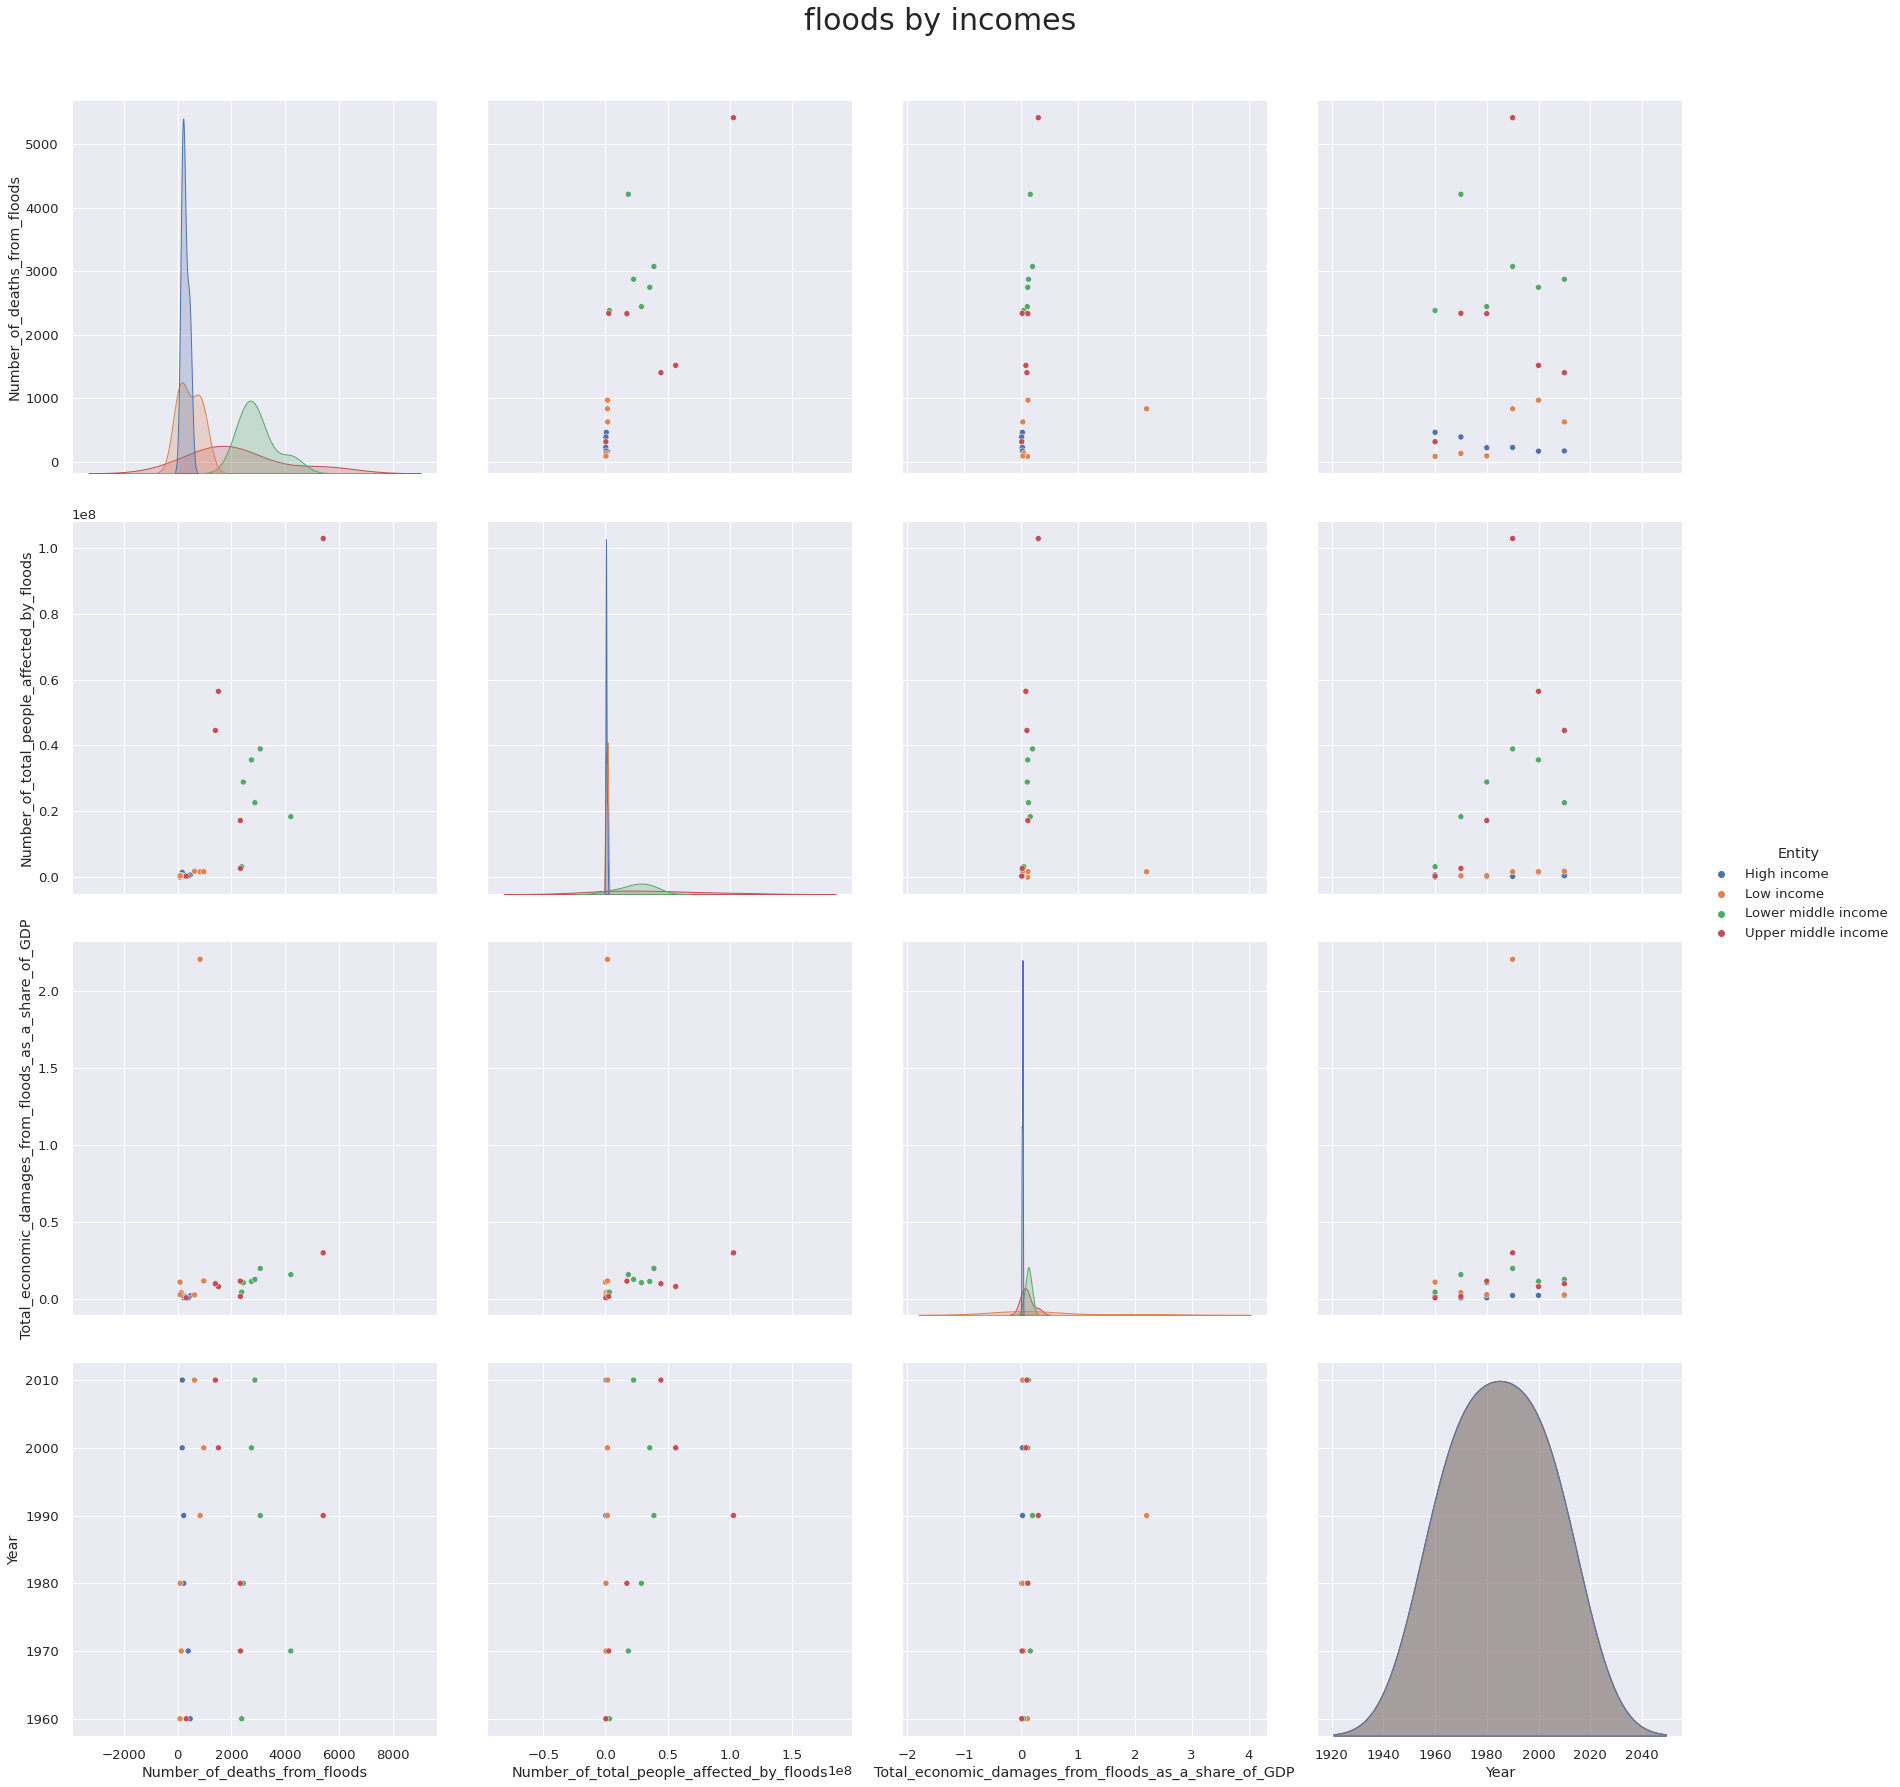

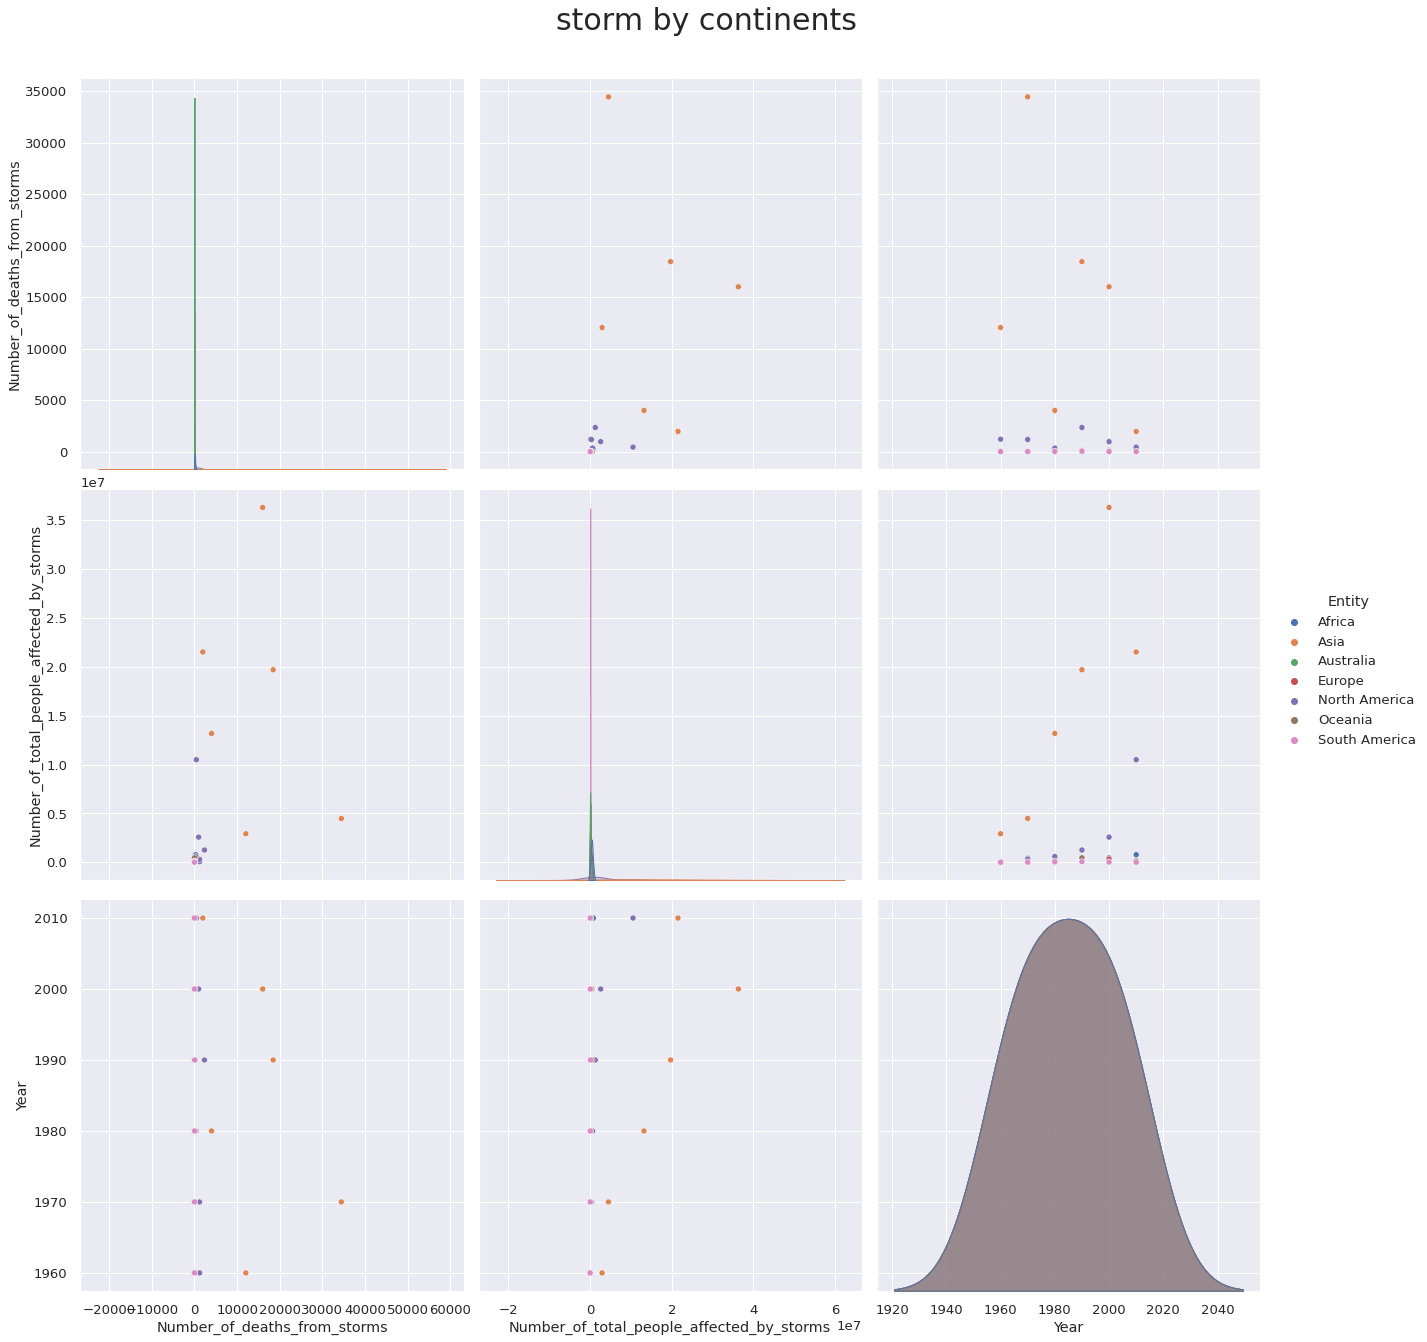

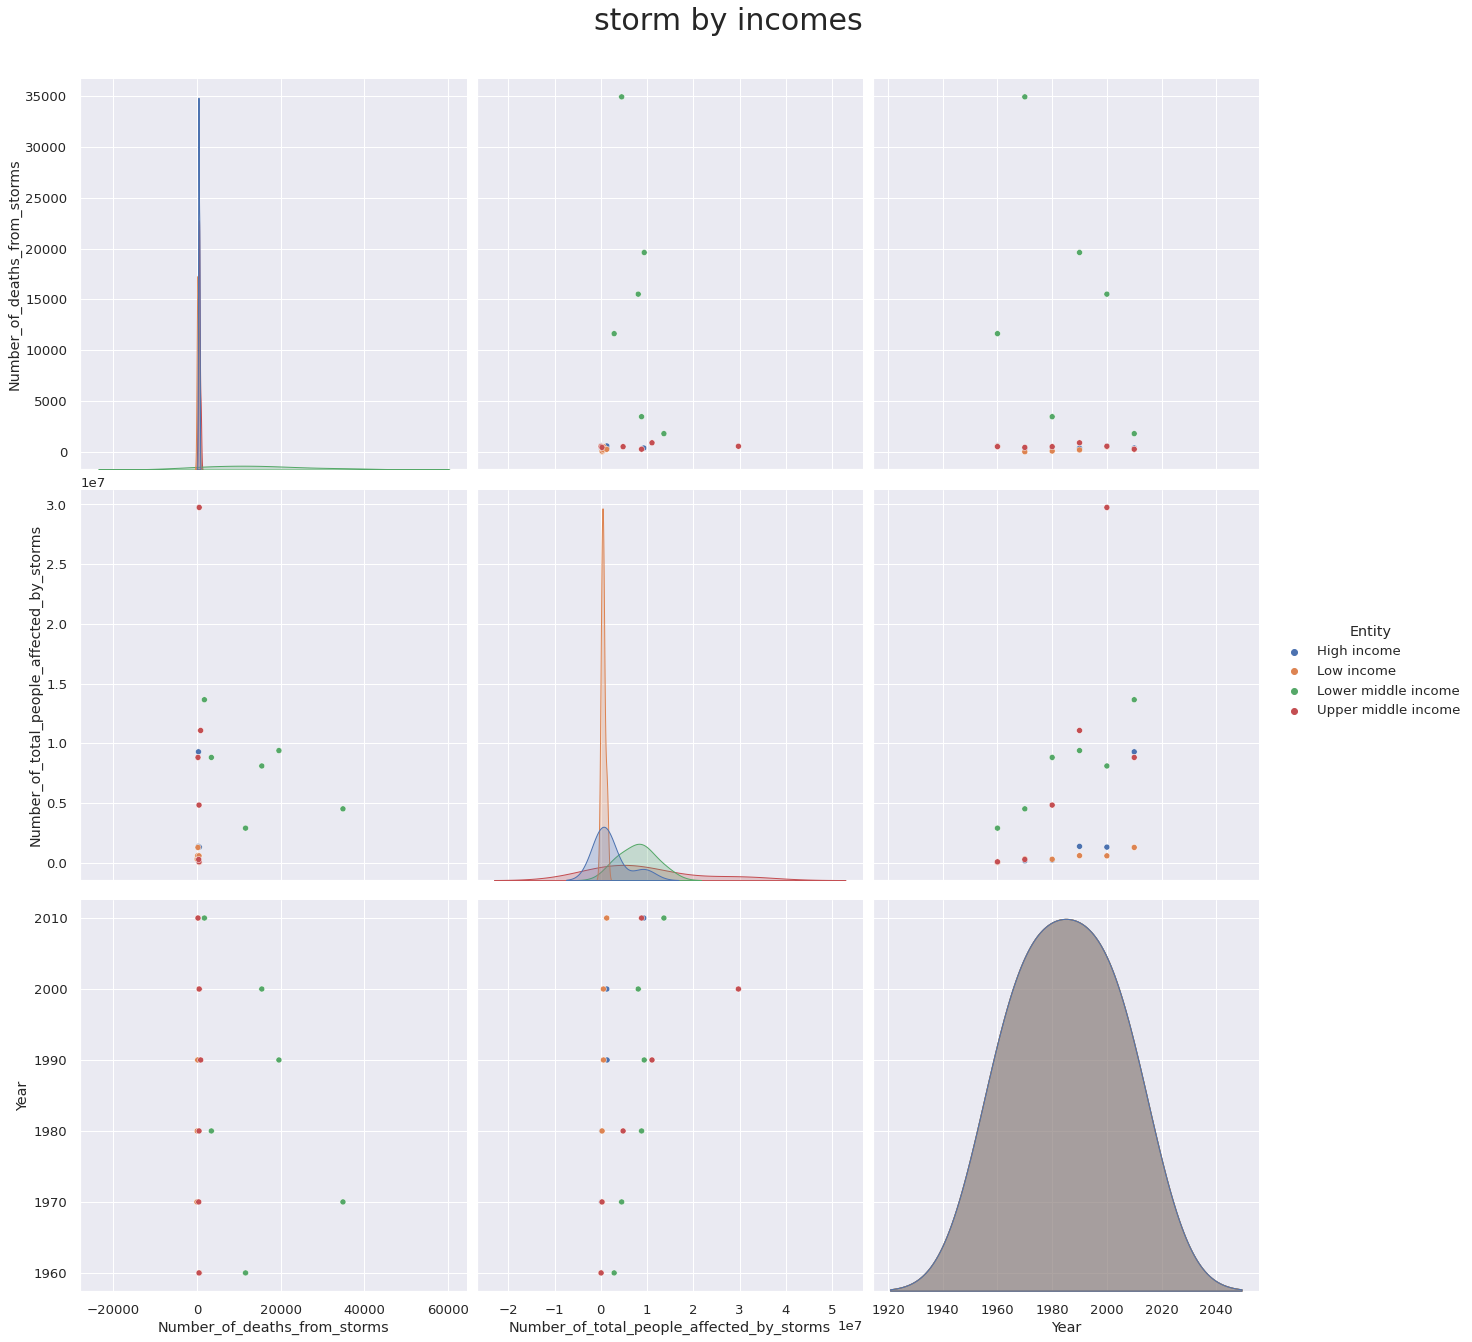

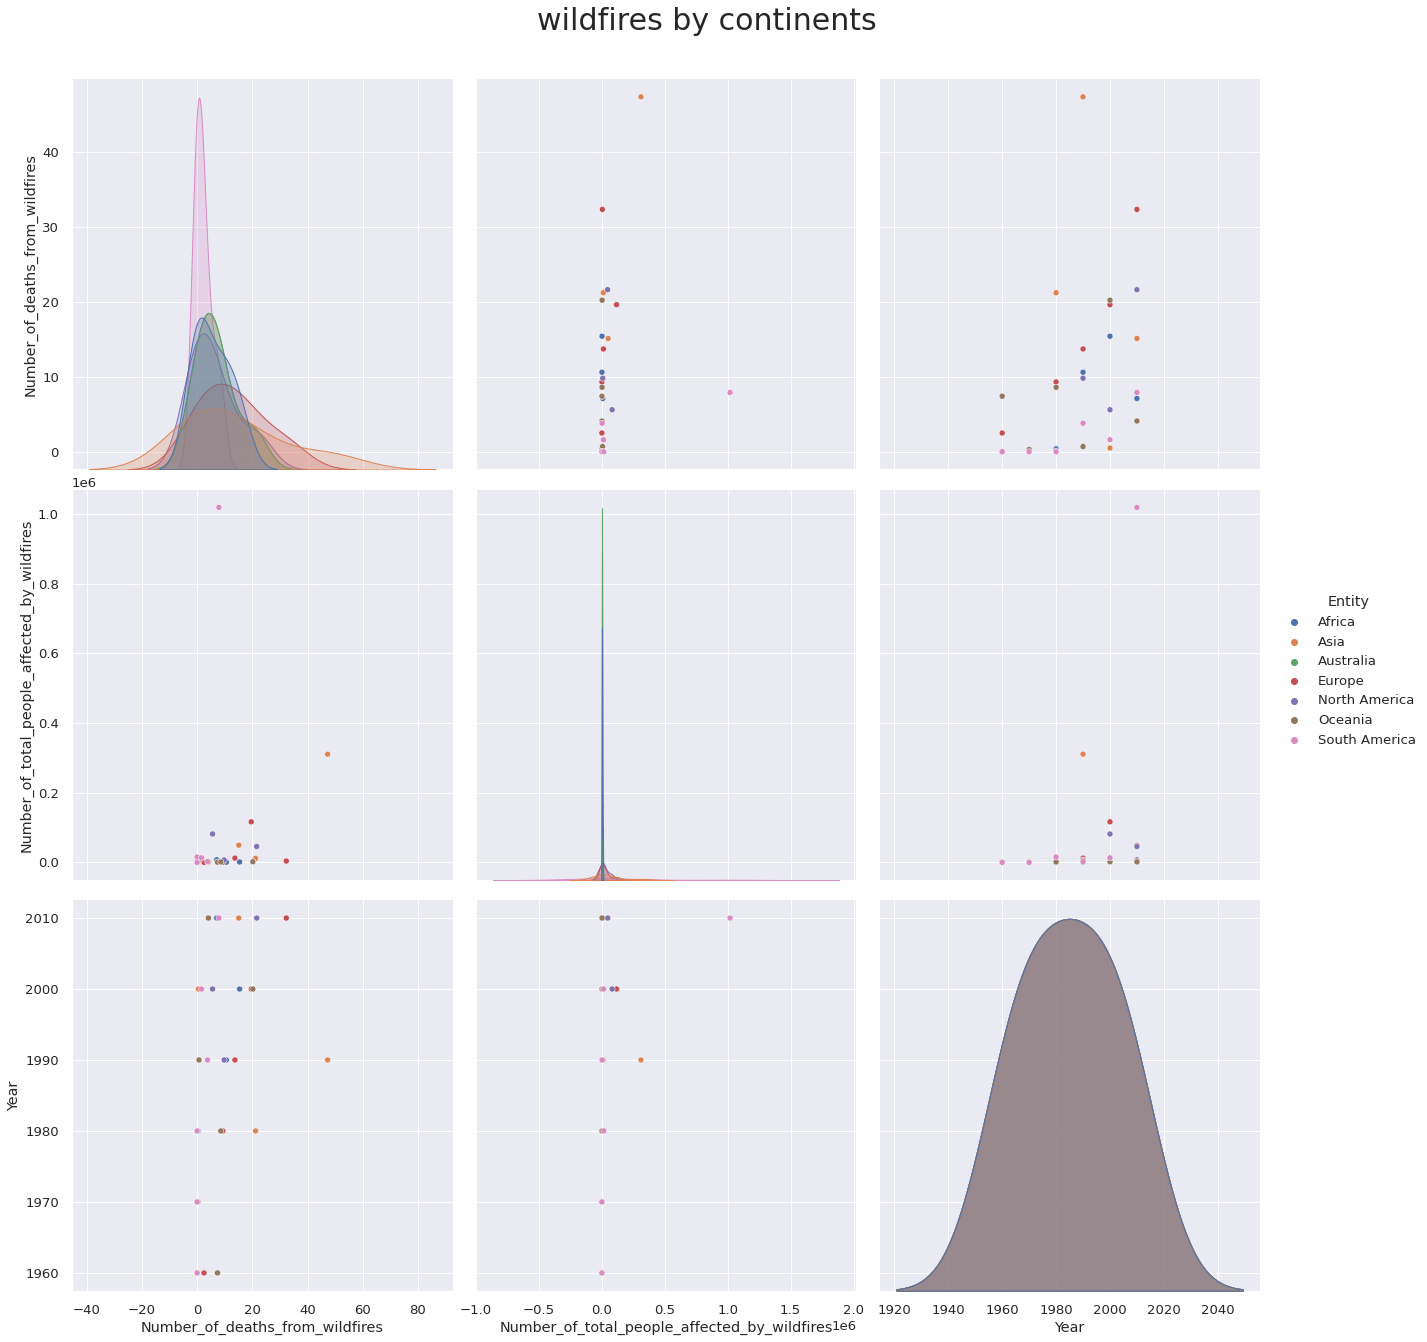

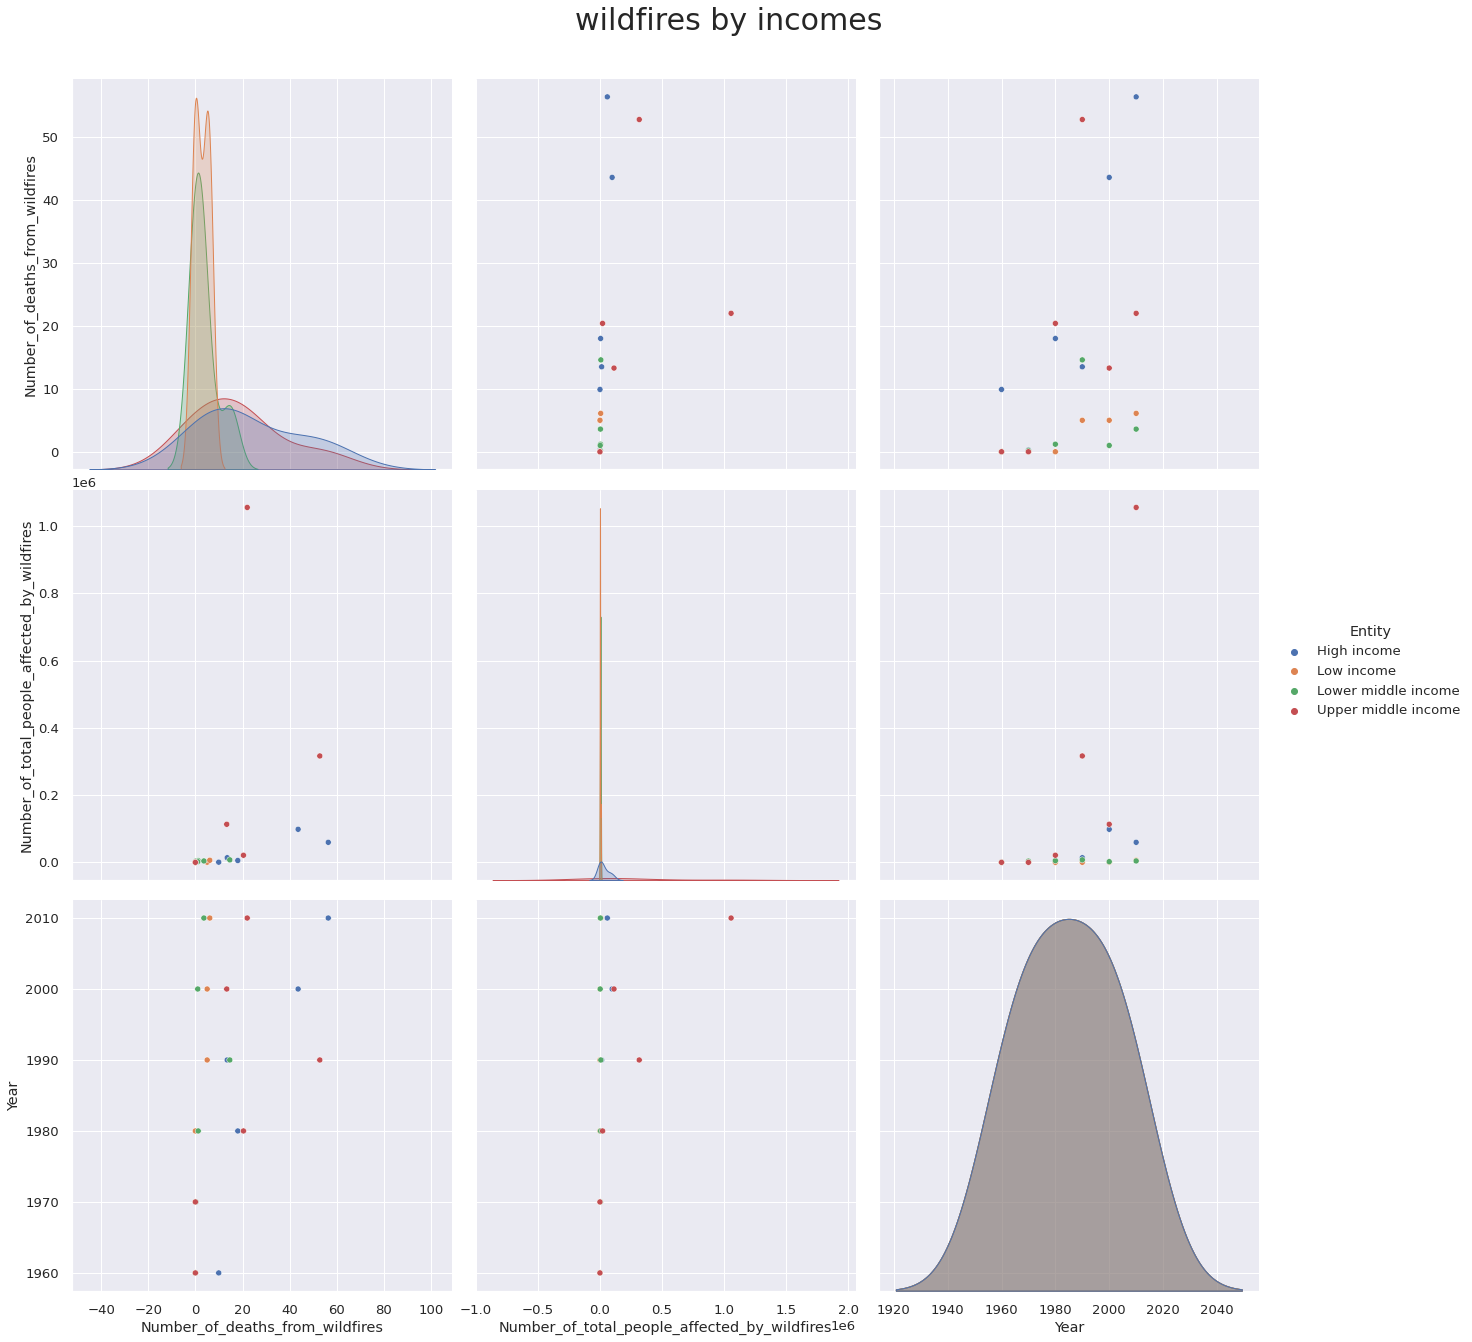

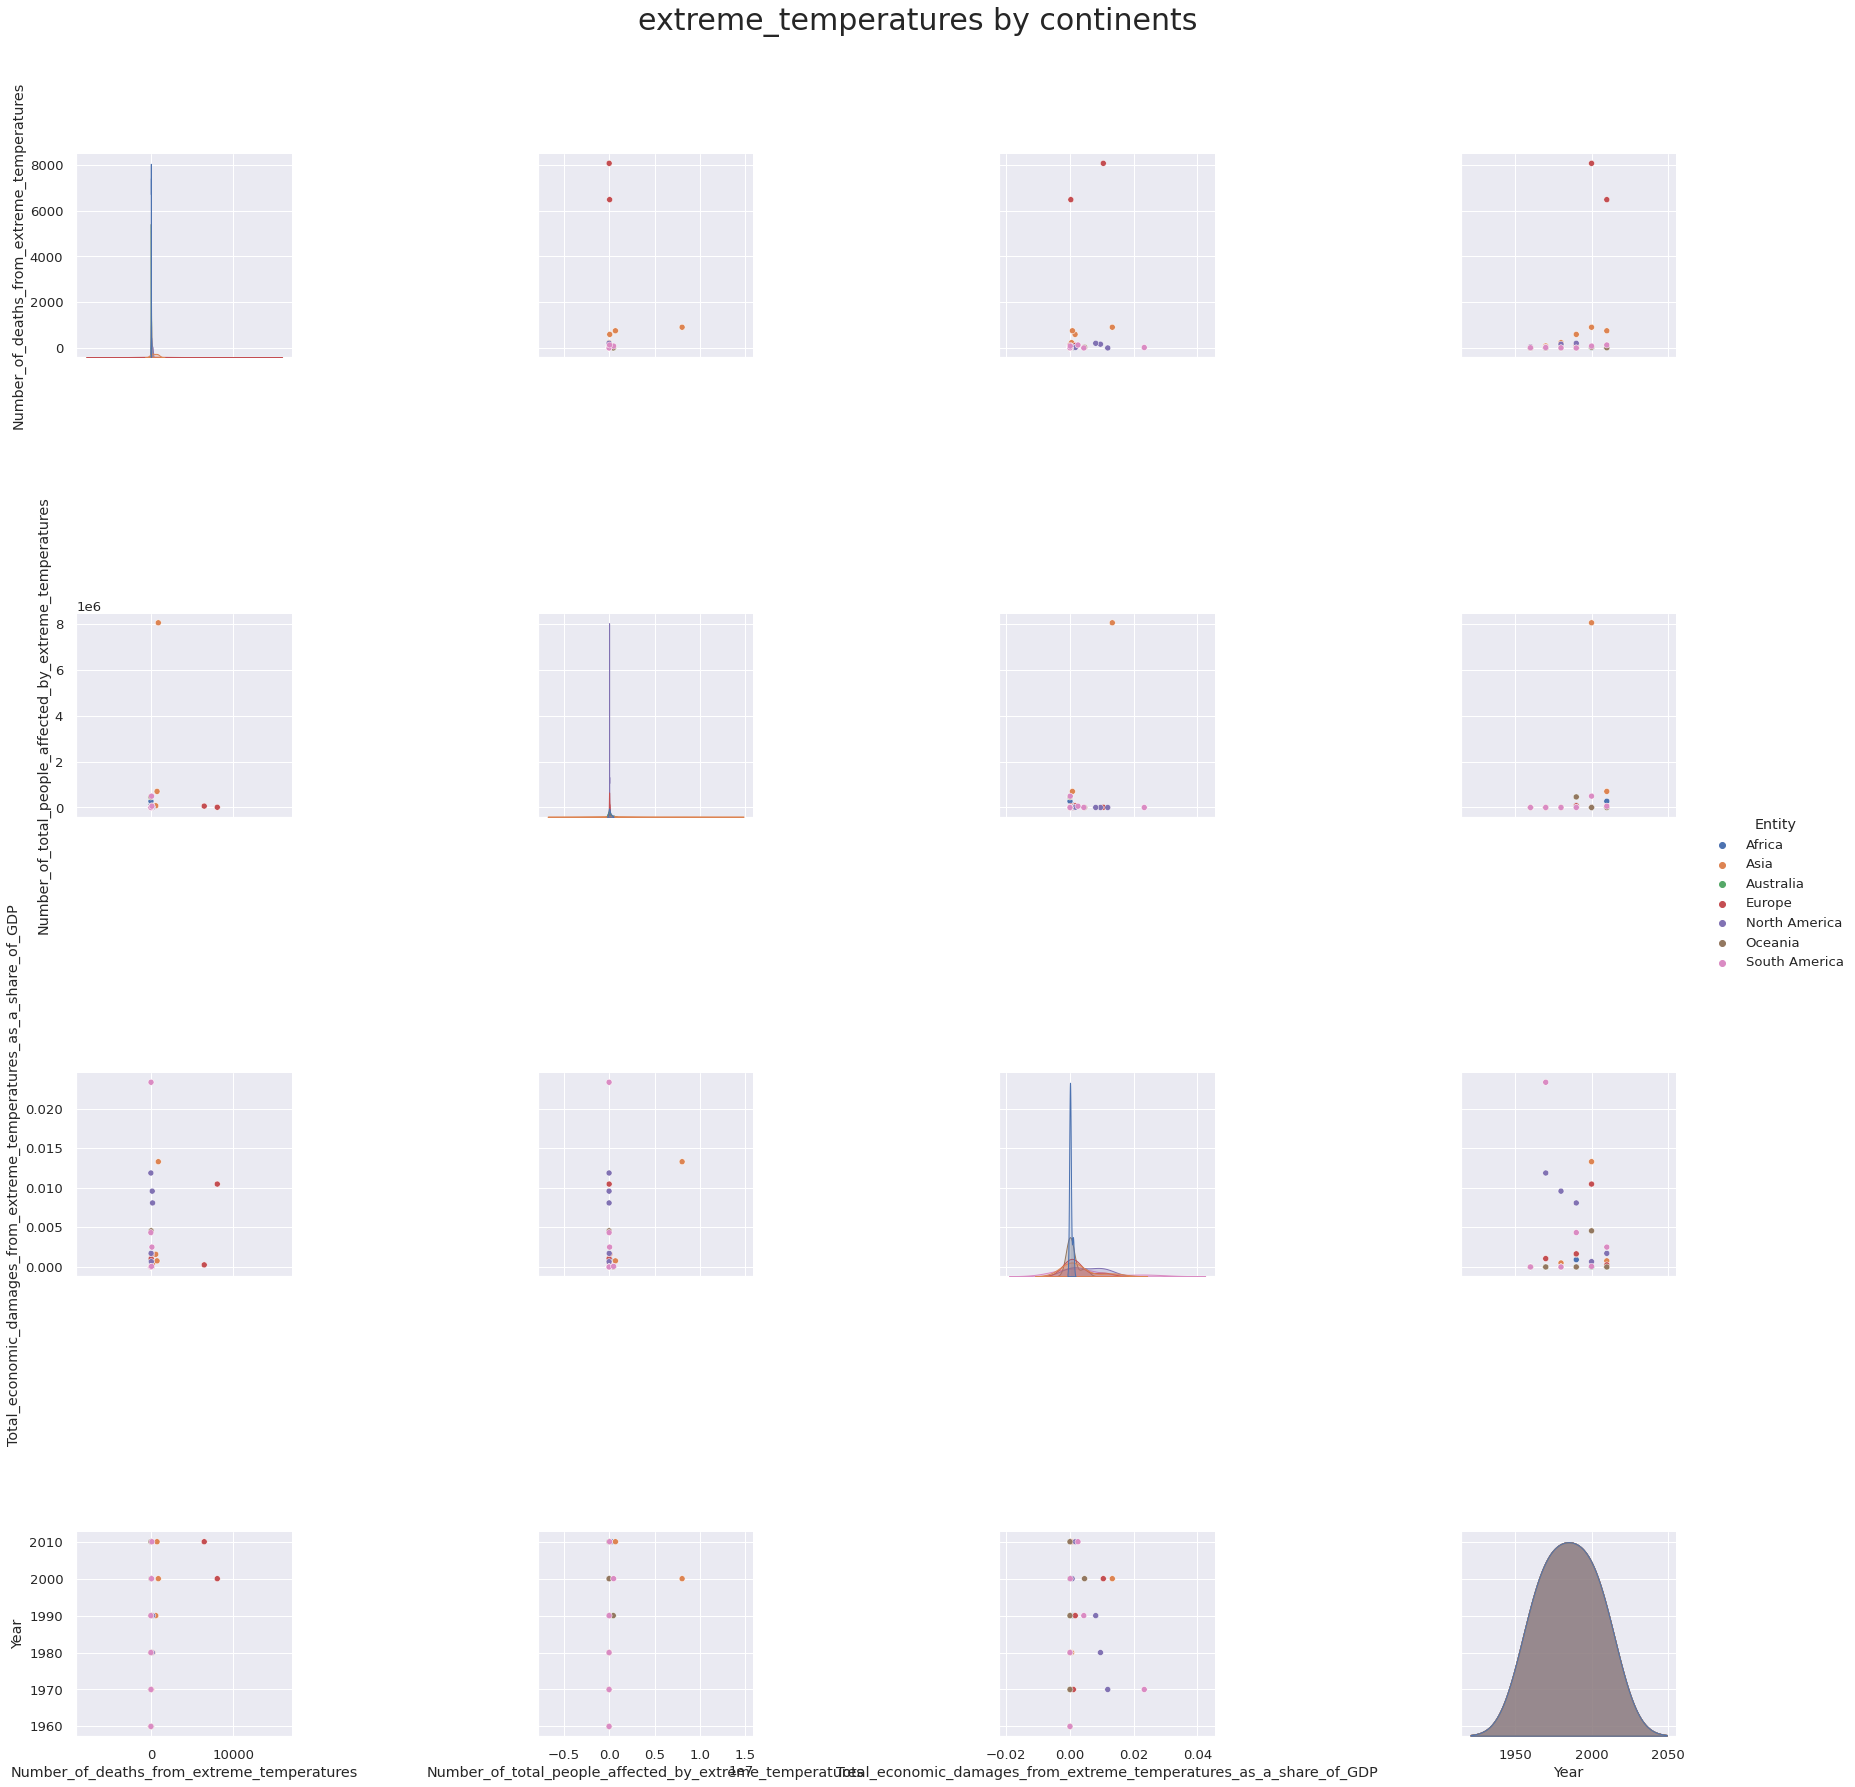

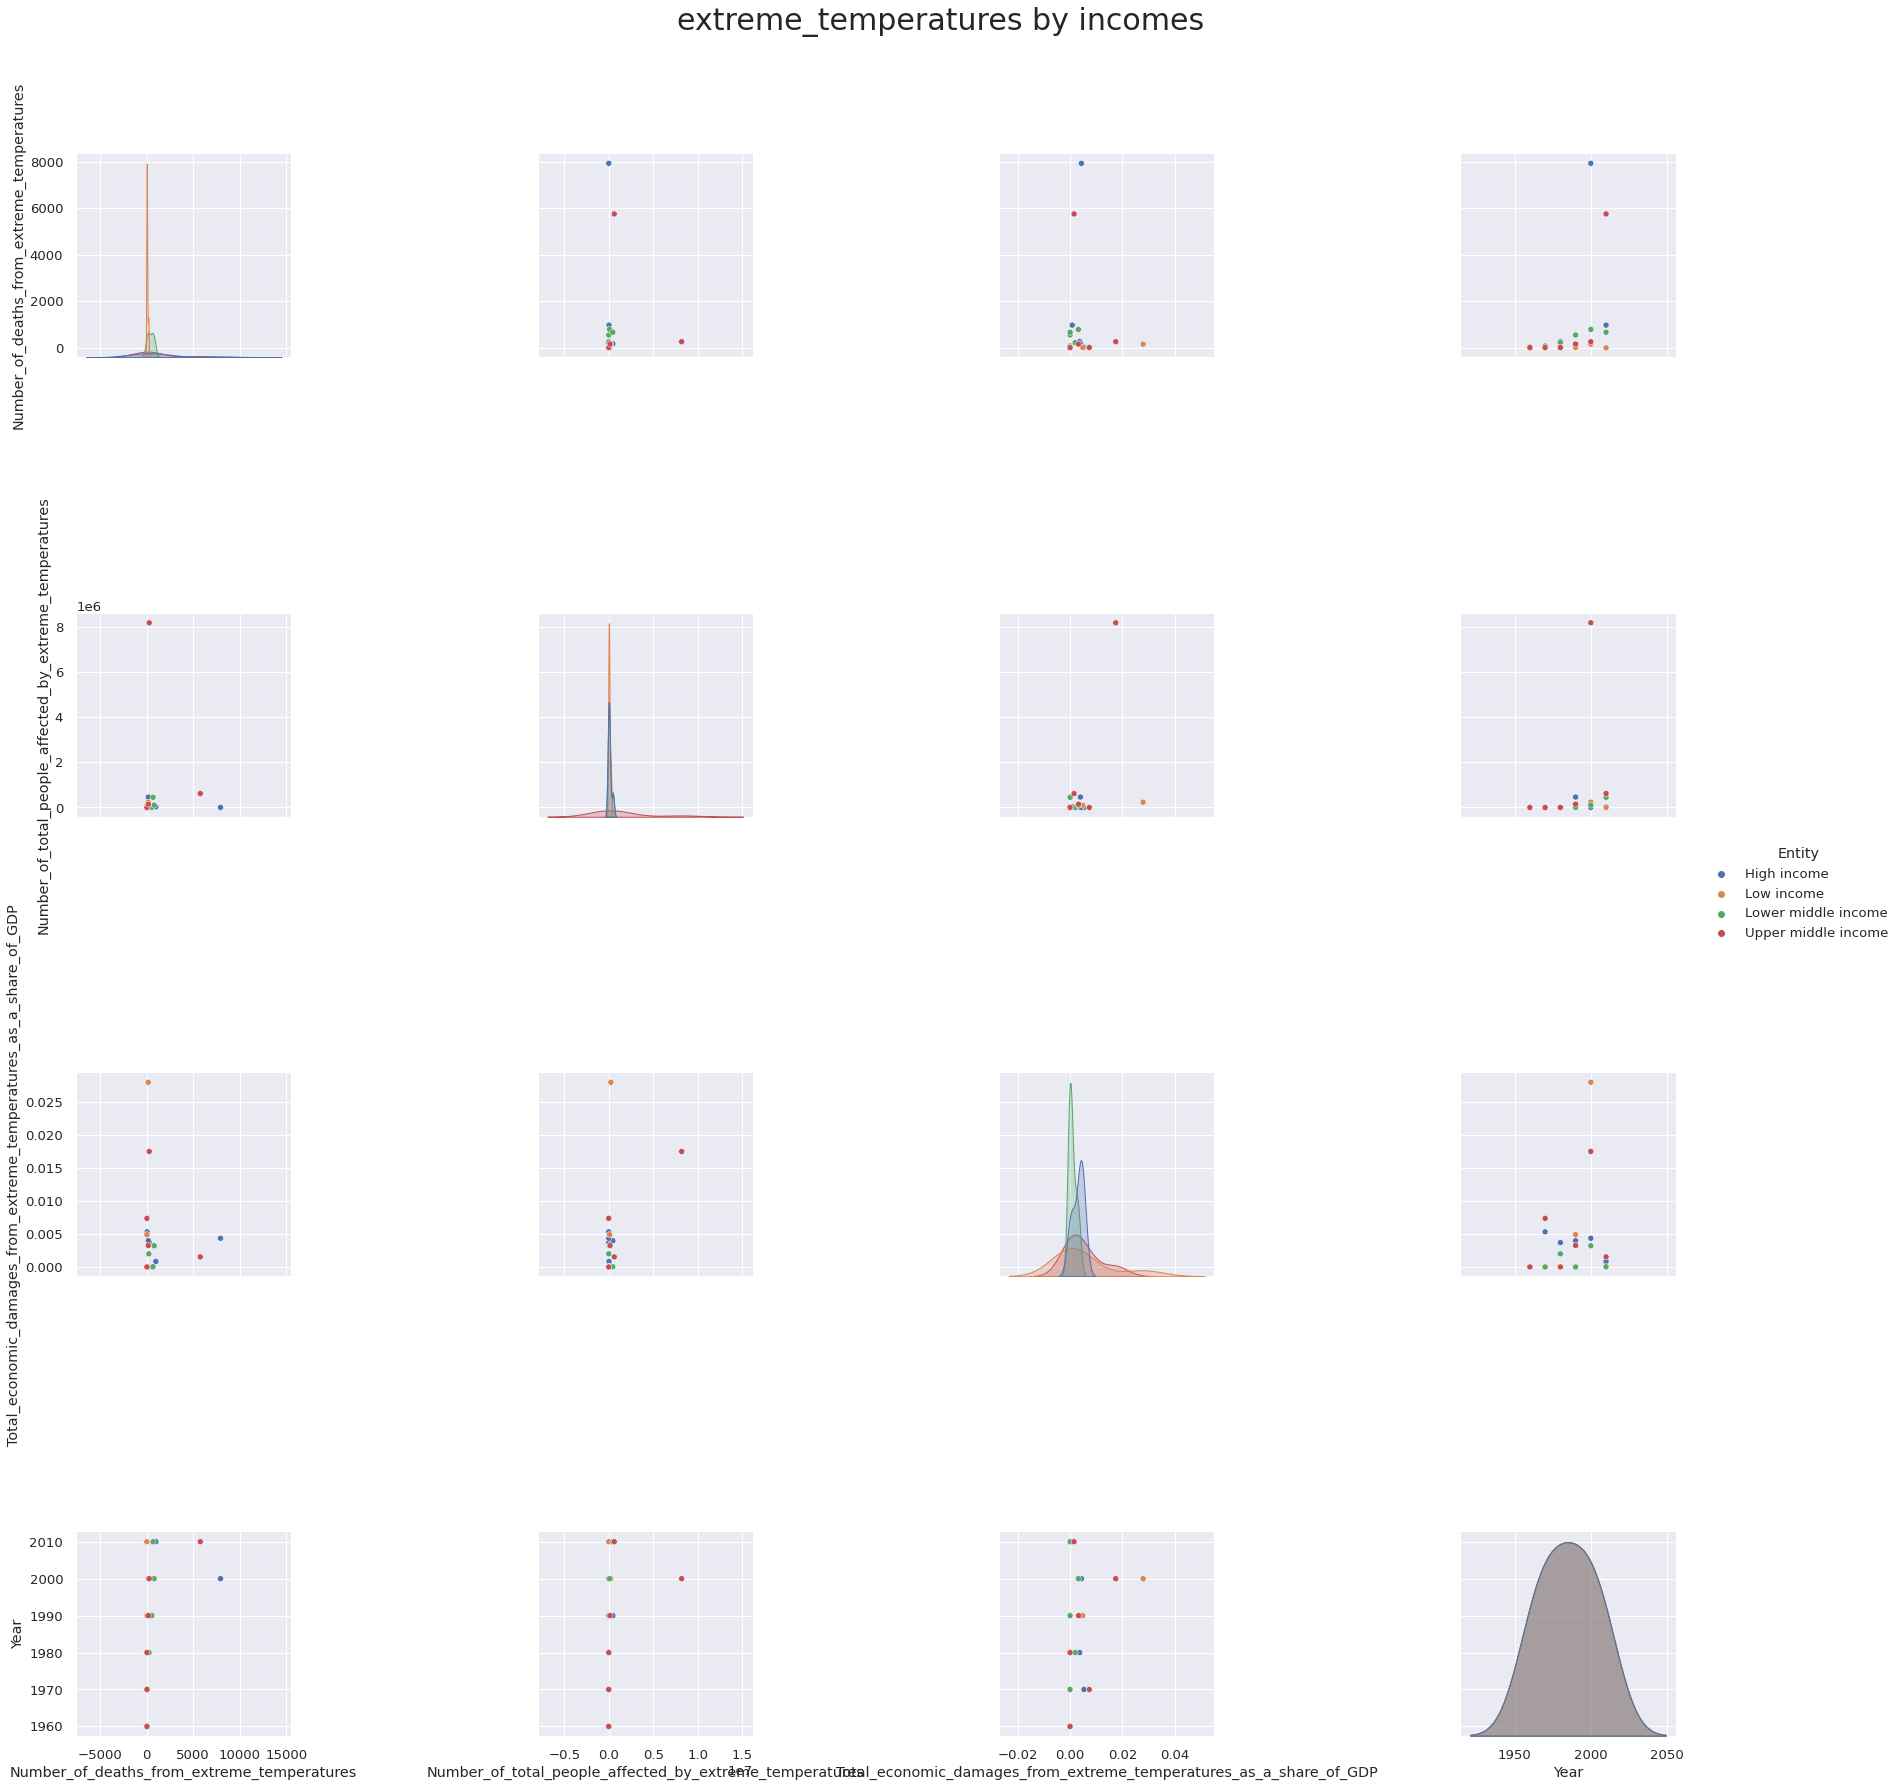

In [159]:
disaster_pairs=['disasters','drought','earthquakes','volcanic_activity','floods','storm','wildfires','extreme_temperatures']
for d in disaster_pairs:
    df_disasters_e=df_continents_1960_2010.loc[:,df_continents_1960_2010.columns.str.contains(pat=f'Total_economic_damages_from_{d}_as_a_share_of_GDP|Number_of_total_people_affected_by_{d}|Number_of_deaths_from_{d}|Year|Entity')].copy()
    df_disasters_i=df_incomes_1960_2010.loc[:,df_incomes_1960_2010.columns.str.contains(pat=f'Total_economic_damages_from_{d}_as_a_share_of_GDP|Number_of_total_people_affected_by_{d}|Number_of_deaths_from_{d}|Year|Entity')].copy()
    sns.set(font_scale=1.2)
    axpe=sns.pairplot(df_disasters_e, hue="Entity", height=6)
    axpe.fig.suptitle(f'{d} by continents' , y=1.04, fontsize=30 )
    sns.set(font_scale=1.2)
    axpi=sns.pairplot(df_disasters_i, hue="Entity", height=6)
    axpi.fig.suptitle(f'{d} by incomes' , y=1.04, fontsize=30 )



# **Conclusions**
- Numbers of casualties due to natural disasters is decreasing with time, in one order of magnitude between 1920 and 2010.
- The distribution of the type of disasters in also changing and shifting from mainly drought and floods to earthquakes, storms and extreme temperature.
- Total number of people affected by natural disasters is increasing with years, implying many injuries, required assistance and housing damages. This in turn has economic burden on countries.


# **Future possible work**
- Investigate all close interactions of the variables
- Obtain annual records of the data and specific locations, in order to maximize the ability to dissect between incidents
- Predict appearance of disasters based on past observations
- Identify "high risk" locations
- Identify world political actions that contributed to the decrease in the casualties over the years
- Identify technological abilities accounted for the improvement in reducing the deaths rates over time
- Investigate the actual coverage of the reported values in the dataset compared with literature facts (as great differences were observed)

